In [158]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import UnivariateSpline
from scipy.optimize import curve_fit
from scipy import stats


In [159]:
#arrays replicas
cfp1=np.fromfile('CFPA3', sep=',')
rfp1=np.fromfile('RFPA3', sep=',')
yfp1=np.fromfile('YFPA3', sep=',')
od1=np.fromfile('ODA3', sep=',')
cfp2=np.fromfile('CFPA4', sep=',')
rfp2=np.fromfile('RFPA4', sep=',')
yfp2=np.fromfile('YFPA4', sep=',')
od2=np.fromfile('ODA4', sep=',')
cfp3=np.fromfile('CFPA5', sep=',')
rfp3=np.fromfile('RFPA5', sep=',')
yfp3=np.fromfile('YFPA5', sep=',')
od3=np.fromfile('ODA5', sep=',')
cfp4=np.fromfile('CFPA6', sep=',')
rfp4=np.fromfile('RFPA6', sep=',')
yfp4=np.fromfile('YFPA6', sep=',')
od4=np.fromfile('ODA6', sep=',')
cfp5=np.fromfile('CFPA7', sep=',')
rfp5=np.fromfile('RFPA7', sep=',')
yfp5=np.fromfile('YFPA7', sep=',')
od5=np.fromfile('ODA7', sep=',')
cfp6=np.fromfile('CFPB3', sep=',')
rfp6=np.fromfile('RFPB3', sep=',')
yfp6=np.fromfile('YFPB3', sep=',')
od6=np.fromfile('ODB3', sep=',')
cfp7=np.fromfile('CFPB4', sep=',')
rfp7=np.fromfile('RFPB4', sep=',')
yfp7=np.fromfile('YFPB4', sep=',')
od7=np.fromfile('ODB4', sep=',')
cfp8=np.fromfile('CFPB5', sep=',')
rfp8=np.fromfile('RFPB5', sep=',')
yfp8=np.fromfile('YFPB5', sep=',')
od8=np.fromfile('ODB5', sep=',')
cfp9=np.fromfile('CFPB6', sep=',')
rfp9=np.fromfile('RFPB6', sep=',')
yfp9=np.fromfile('YFPB6', sep=',')
od9=np.fromfile('ODB6', sep=',')
cfp10=np.fromfile('CFPB7', sep=',')
rfp10=np.fromfile('RFPB7', sep=',')
yfp10=np.fromfile('YFPB7', sep=',')
od10=np.fromfile('ODB7', sep=',')
tt=np.fromfile('t', sep=',')
#Promedios
cfpp=np.fromfile('psssgCFP', sep=',')
rfpp=np.fromfile('psssgRFP', sep=',')
yfpp=np.fromfile('psssgYFP', sep=',')
odp=np.fromfile('psssgOD', sep=',')

#Controles
#Promedios controles glucosa
cfpc=np.fromfile('pcgCFP', sep=',')
rfpc=np.fromfile('pcgRFP', sep=',')
yfpc=np.fromfile('pcgYFP', sep=',')
odc=np.fromfile('pcgOD', sep=',')


CFPS=[cfp1,cfp2,cfp3,cfp4,cfp5,cfp6,cfp7,cfp8,cfp9,cfp10]
RFPS=[rfp1,rfp2,rfp3,rfp4,rfp5,rfp6,rfp7,rfp8,rfp9,rfp10]
YFPS=[yfp1,yfp2,yfp3,yfp4,yfp5,yfp6,yfp7,yfp8,yfp9,yfp10]
ODS=[od1,od2,od3,od4,od5,od6,od7,od8,od9,od10]

print(cfpp.shape)
print(rfpp.shape)
print(yfpp.shape)
print(odp.shape)
print(tt.shape)

(97,)
(97,)
(97,)
(97,)
(97,)


In [160]:
#Funciones para ajuste Gompertz
def F_sigma(t, A, um,l):
    return ((A*np.exp(-np.exp((((um*np.exp(1))/A)*(l-t))+1))))

def Function_fit(xdata,ydata,init,end,func=F_sigma,ParamBounds=([0,0,0],[3,1,300]), fig_name = False, title = 'Curve Fitting'):
        Y_fit={}

        z,_=curve_fit(func,xdata[init:end], ydata[init:end],bounds=ParamBounds)

        print(z)

        evalF=func(xdata,z[0],z[1],z[2])
        
        plt.figure()
        plt.plot(xdata, ydata, '.',label='OD')
        plt.plot(xdata, evalF, '-',label='Ajuste')
        plt.grid(color='lightgray', linestyle='-', linewidth=0.5)
        plt.title(title)
        plt.ylabel('Abs(nm)')
        plt.xlabel('Tiempo(min)')
        lgd=plt.legend(loc='lower right')
        
          
        if fig_name != False:
            plt.savefig(fig_name, dpi=None, facecolor='w', edgecolor='k',transparent=True, bbox_extra_artists=(lgd))
        
        plt.show()

        Y_fit=evalF,z
        
        return(Y_fit)
        
       


Min OD = 8.275000e-02
[  2.27987016e+00   1.00649666e-02   1.55693371e+02]


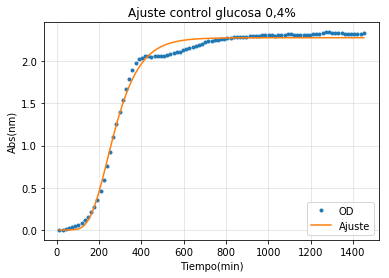

A=2.279870e+00
um=1.006497e-02
l=1.556934e+02
Tm=2.390237e+02
doubpe=6.886731e+01
ext=1.377346e+02
Tfinal=3.767584e+02


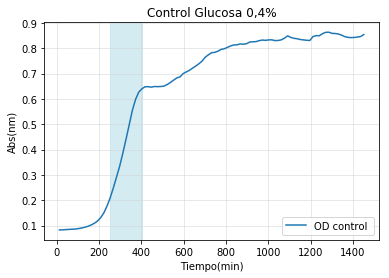

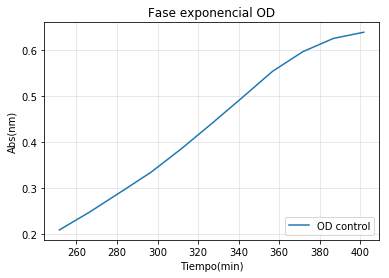

In [161]:
#Ajuste de datos con modelo Gompertz y obtención de parámetros para el ajuste
#control glucosa
yc = np.log(odc)-np.log(np.min(odc))
print('Min OD = %e'%((np.min(odc))))
evaly, params=Function_fit(tt,yc,0,-1, fig_name = 'Ajuste control glucosa.pdf', title = 'Ajuste control glucosa 0,4%')
Ac = params[0]
umc=params[1]
lc=params[2]
print('A=%e'%(Ac))
print('um=%e'%(umc))
print('l=%e'%(lc))

#Cálculo datos para determinar extensión de la fase exponencial
tmc=((Ac/(np.exp(1)*umc))+lc)
print('Tm=%e'%(tmc))
t2c=((np.log(2))/umc)
print('doubpe=%e'%(t2c))
extdpc=2*t2c
print('ext=%e'%extdpc)
ttotc=tmc+extdpc
print('Tfinal=%e'%ttotc)

#Delimitación fase exponencial en grafico con OD/tiempo 
y1=tt[16]
y2=tt[26]
plt.figure()
plt.title('Control Glucosa 0,4%')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt,odc,label='OD control ')
plt.axvspan(y1,y2, color='lightblue', alpha=0.5)
plt.grid(color='lightgray', linestyle='-', linewidth=0.5)
plt.legend(loc='lower right')

#Fase exponencial OD/tiempo
plt.figure()
plt.title('Fase exponencial OD')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt[16:27],odc[16:27],label='OD control')
plt.grid(color='lightgray', linestyle='-', linewidth=0.5)
plt.legend(loc='lower right')

Min OD = 8.240000e-02
[  2.33932298e+00   9.81549169e-03   1.86507491e+02]


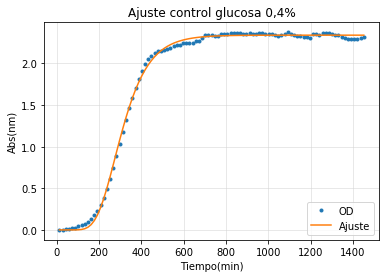

A=2.339323e+00
um=9.815492e-03
l=1.865075e+02
Tm=2.741841e+02
doubpe=7.061767e+01
ext=1.412353e+02
Tfinal=4.154194e+02


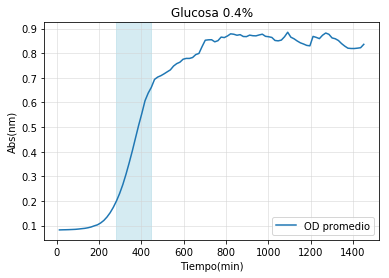

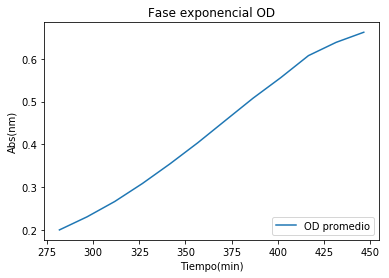

In [162]:
#Ajuste de datos con modelo Gompertz y obtención de parámetros para el ajuste
#promedio
y = np.log(odp)-np.log(np.min(odp))
print('Min OD = %e'%((np.min(odp))))
evaly, params=Function_fit(tt,y,0,-1,fig_name = 'Ajuste promedio glucosa.pdf', title = 'Ajuste control glucosa 0,4%')
A = params[0]
um=params[1]
l=params[2]
print('A=%e'%(A))
print('um=%e'%(um))
print('l=%e'%(l))

#Cálculo datos para determinar extensión de la fase exponencial
tm=((A/(np.exp(1)*um))+l)
print('Tm=%e'%(tm))
t2=((np.log(2))/um)
print('doubpe=%e'%(t2))
extdp=2*t2
print('ext=%e'%extdp)
ttot=tm+extdp
print('Tfinal=%e'%ttot)
#Delimitación fase exponencial en grafico con OD/tiempo 
y1=tt[18]
y2=tt[29]
plt.figure()
plt.title('Glucosa 0.4%')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt,odp,label='OD promedio')
plt.axvspan(y1,y2, color='lightblue', alpha=0.5)
plt.grid(color='lightgray', linestyle='-', linewidth=0.5)
lgd=plt.legend(loc='lower right')


#Fase exponencial OD/tiempo
plt.figure()
plt.title('Fase exponencial OD')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt[18:30],odp[18:30],label='OD promedio')
plt.legend(loc='lower right')


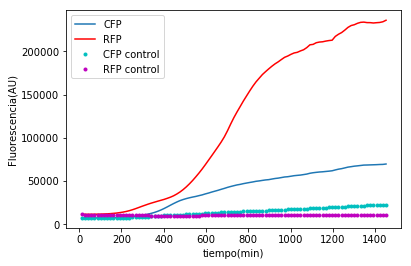

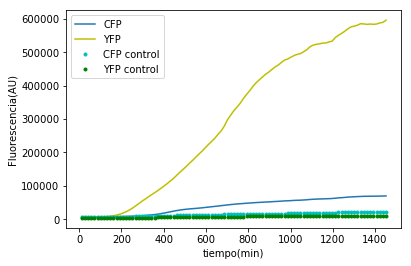

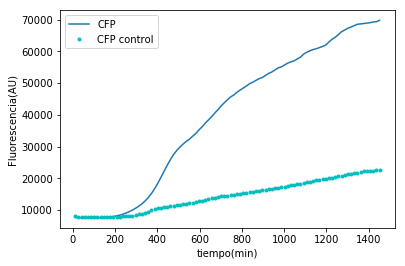

In [163]:
plt.figure()
plt.xlabel('tiempo(min)')
plt.ylabel('Fluorescencia(AU)')
plt.plot(tt,cfpp, label='CFP')
plt.plot(tt,rfpp,'r',label='RFP')
plt.plot(tt,cfpc,'c.', label='CFP control')
plt.plot(tt,rfpc,'m.',label='RFP control')
plt.legend(loc='upper left')

plt.figure()
plt.xlabel('tiempo(min)')
plt.ylabel('Fluorescencia(AU)')
plt.plot(tt,cfpp, label='CFP')
plt.plot(tt,yfpp,'y',label='YFP')
plt.plot(tt,cfpc,'c.', label='CFP control')
plt.plot(tt,yfpc,'g.',label='YFP control')
plt.legend(loc='upper left')
plt.figure()
plt.xlabel('tiempo(min)')
plt.ylabel('Fluorescencia(AU)')
plt.plot(tt,cfpp, label='CFP')
plt.plot(tt,cfpc,'c.', label='CFP control')
plt.legend(loc='upper left')

[  2.34835880e+00   9.96134182e-03   1.92765223e+02]


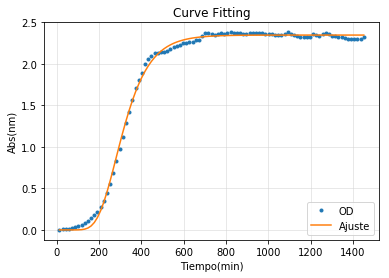

A=2.348359e+00
um=9.961342e-03
l=1.927652e+02
Tm=2.794918e+02
doubpe=6.958372e+01
ext=1.391674e+02
Tfinal=4.186592e+02


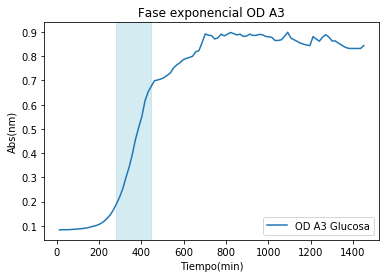

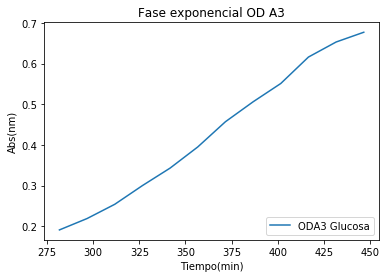

In [164]:
#Ajuste de datos con modelo Gompertz y obtención de parámetros para el ajuste
#Function_fit(xdata,ydata,init,end,func=F_sigma,ParamBounds=([1,-np.inf,0.1],[np.inf,-1,1]))
#A3
y1 = np.log(od1)-np.log(np.min(od1))
evaly, params=Function_fit(tt,y1,0,-1)
A1 = params[0]
um1=params[1]
l1=params[2]
print('A=%e'%(A1))
print('um=%e'%(um1))
print('l=%e'%(l1))

#Cálculo datos para determinar extensión de la fase exponencial
tm1=((A1/(np.exp(1)*um1))+l1)
print('Tm=%e'%(tm1))
t21=((np.log(2))/um1)
print('doubpe=%e'%(t21))
extdp1=2*t21
print('ext=%e'%extdp1)
ttot1=tm1+extdp1
print('Tfinal=%e'%ttot1)

#Delimitación fase exponencial en grafico con OD/tiempo 
y1=tt[18]
y2=tt[29]
plt.figure()
plt.title('Fase exponencial OD A3')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt,od1,label='OD A3 Glucosa')
plt.axvspan(y1,y2, color='lightblue', alpha=0.5)
plt.legend(loc='lower right')

#Fase exponencial OD/tiempo A3
plt.figure()
plt.title('Fase exponencial OD A3')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt[18:30],od1[18:30],label='ODA3 Glucosa')
plt.legend(loc='lower right')

[  2.24616441e+00   8.47532959e-03   2.35528433e+02]


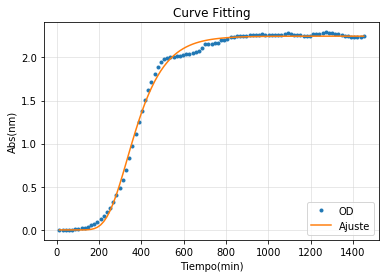

A=2.246164e+00
um=8.475330e-03
l=2.355284e+02
Tm=3.330253e+02
doubpe=8.178410e+01
ext=1.635682e+02
Tfinal=4.965935e+02


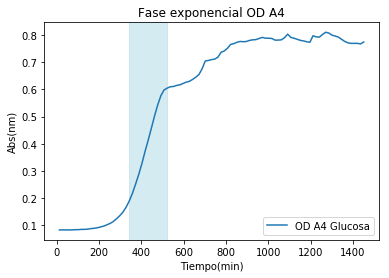

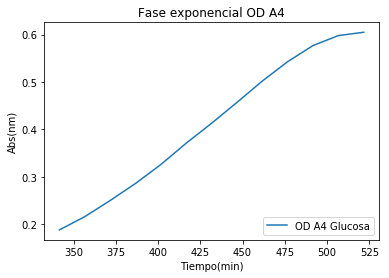

In [165]:
#A4
plt.figure()
y2 = np.log(od2)-np.log(np.min(od2))
evaly, params=Function_fit(tt,y2,0,-1)
A2 = params[0]
um2=params[1]
l2=params[2]
print('A=%e'%(A2))
print('um=%e'%(um2))
print('l=%e'%(l2))

#Cálculo datos para determinar extensión de la fase exponencial
tm2=((A2/(np.exp(1)*um2))+l2)
print('Tm=%e'%(tm2))
t22=((np.log(2))/um2)
print('doubpe=%e'%(t22))
extdp2=2*t22
print('ext=%e'%extdp2)
ttot2=tm2+extdp2
print('Tfinal=%e'%ttot2)

#Delimitación fase exponencial en grafico con OD/tiempo 
y1=tt[22]
y2=tt[34]
plt.figure()
plt.title('Fase exponencial OD A4')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt,od2,label='OD A4 Glucosa')
plt.axvspan(y1,y2, color='lightblue', alpha=0.5)
plt.legend(loc='lower right')

#Fase exponencial OD/tiempo 
plt.figure()
plt.title('Fase exponencial OD A4')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt[22:35],od2[22:35],label='OD A4 Glucosa')
plt.legend(loc='lower right')

[  2.34490093e+00   9.12663783e-03   2.00335074e+02]


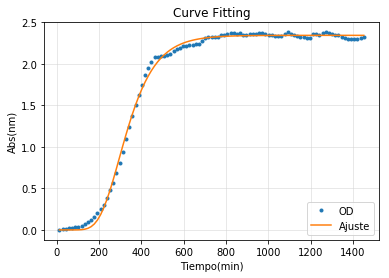

A=2.344901e+00
um=9.126638e-03
l=2.003351e+02
Tm=2.948541e+02
doubpe=7.594770e+01
ext=1.518954e+02
Tfinal=4.467495e+02


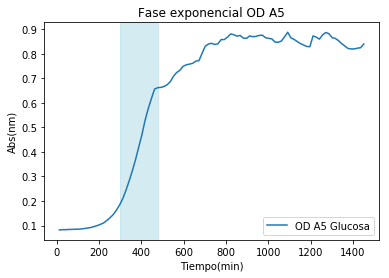

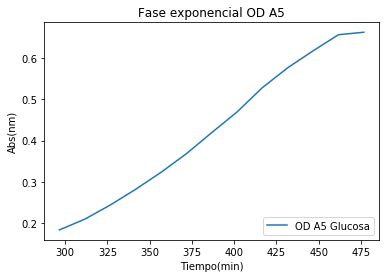

In [166]:
#A5
plt.figure()
y3= np.log(od3)-np.log(np.min(od3))
evaly, params=Function_fit(tt,y3,0,-1)
A3 = params[0]
um3=params[1]
l3=params[2]
print('A=%e'%(A3))
print('um=%e'%(um3))
print('l=%e'%(l3))

#Cálculo datos para determinar extensión de la fase exponencial
tm3=((A3/(np.exp(1)*um3))+l3)
print('Tm=%e'%(tm3))
t23=((np.log(2))/um3)
print('doubpe=%e'%(t23))
extdp3=2*t23
print('ext=%e'%extdp3)
ttot3=tm3+extdp3
print('Tfinal=%e'%ttot3)

#Delimitación fase exponencial en grafico con OD/tiempo 
y1=tt[19]
y2=tt[31]
plt.figure()
plt.title('Fase exponencial OD A5')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt,od3,label='OD A5 Glucosa')
plt.axvspan(y1,y2, color='lightblue', alpha=0.5)
plt.legend(loc='lower right')

#Fase exponencial OD/tiempo A3
plt.figure()
plt.title('Fase exponencial OD A5')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt[19:32],od3[19:32],label='OD A5 Glucosa')
plt.legend(loc='lower right')

[  2.38448056e+00   1.21923667e-02   2.00140901e+02]


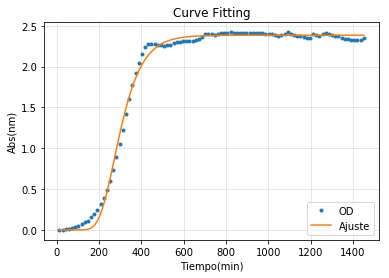

A=2.384481e+00
um=1.219237e-02
l=2.001409e+02
Tm=2.720877e+02
doubpe=5.685091e+01
ext=1.421273e+02
Tfinal=4.142150e+02


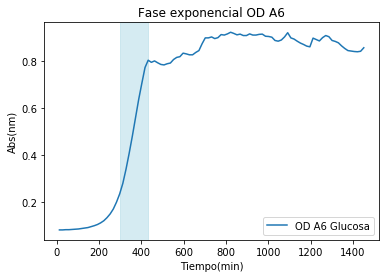

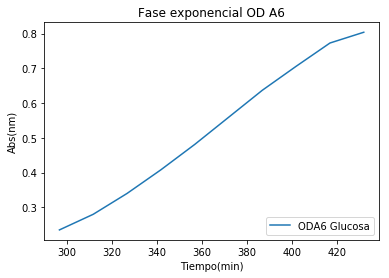

In [167]:
#A6
plt.figure()
y4 = np.log(od4)-np.log(np.min(od4))
evaly, params=Function_fit(tt,y4,0,-1)
A4 = params[0]
um4=params[1]
l4=params[2]
print('A=%e'%(A4))
print('um=%e'%(um4))
print('l=%e'%(l4))

#Cálculo datos para determinar extensión de la fase exponencial
tm4=((A4/(np.exp(1)*um4))+l4)
print('Tm=%e'%(tm4))
t24=((np.log(2))/um4)
print('doubpe=%e'%(t24))
extdp4=2.5*t24
print('ext=%e'%extdp4)
ttot4=tm4+extdp4
print('Tfinal=%e'%ttot4)

#Delimitación fase exponencial en grafico con OD/tiempo 
y1=tt[19]
y2=tt[28]
plt.figure()
plt.title('Fase exponencial OD A6')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt,od4,label='OD A6 Glucosa')
plt.axvspan(y1,y2, color='lightblue', alpha=0.5)
plt.legend(loc='lower right')

#Fase exponencial OD/tiempo 
plt.figure()
plt.title('Fase exponencial OD A6')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt[19:29],od4[19:29],label='ODA6 Glucosa')
plt.legend(loc='lower right')

[  2.31002460e+00   1.30612975e-02   1.77086793e+02]


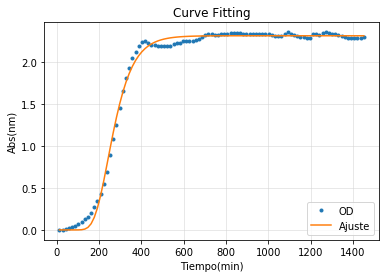

A=2.310025e+00
um=1.306130e-02
l=1.770868e+02
Tm=2.421501e+02
doubpe=5.306878e+01
ext=1.326720e+02
Tfinal=3.748220e+02


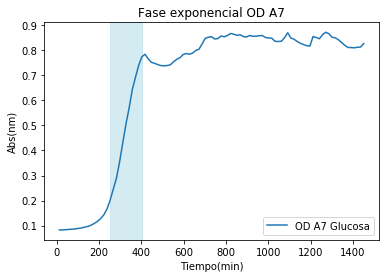

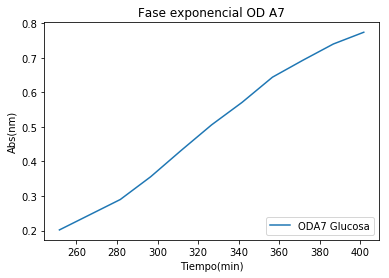

In [168]:
#A7
plt.figure()
y5 = np.log(od5)-np.log(np.min(od5))
evaly, params=Function_fit(tt,y5,0,-1)
A5 = params[0]
um5=params[1]
l5=params[2]
print('A=%e'%(A5))
print('um=%e'%(um5))
print('l=%e'%(l5))

#Cálculo datos para determinar extensión de la fase exponencial
tm5=((A5/(np.exp(1)*um5))+l5)
print('Tm=%e'%(tm5))
t25=((np.log(2))/um5)
print('doubpe=%e'%(t25))
extdp5=2.5*t25
print('ext=%e'%extdp5)
ttot5=tm5+extdp5
print('Tfinal=%e'%ttot5)

#Delimitación fase exponencial en grafico con OD/tiempo 
y1=tt[16]
y2=tt[26]
plt.figure()
plt.title('Fase exponencial OD A7')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt,od5,label='OD A7 Glucosa')
plt.axvspan(y1,y2, color='lightblue', alpha=0.5)
plt.legend(loc='lower right')

#Fase exponencial OD/tiempo 
plt.figure()
plt.title('Fase exponencial OD A7')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt[16:27],od5[16:27],label='ODA7 Glucosa')
plt.legend(loc='lower right')

[  2.36113942e+00   1.34200077e-02   1.54366555e+02]


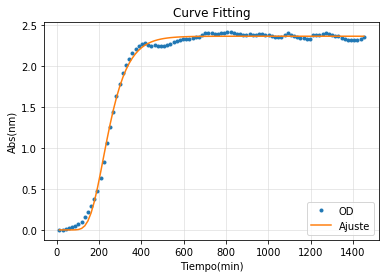

A=2.361139e+00
um=1.342001e-02
l=1.543666e+02
Tm=2.190919e+02
doubpe=5.165028e+01
ext=1.291257e+02
Tfinal=3.482176e+02


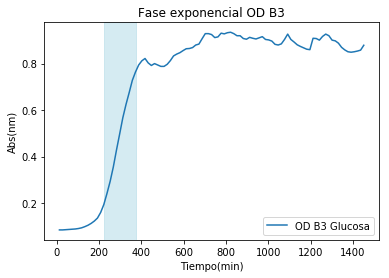

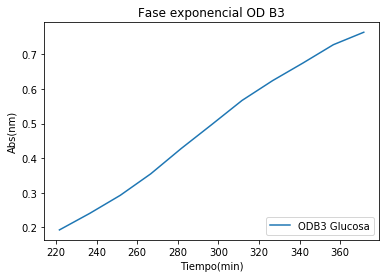

In [169]:
#B3
plt.figure()
y6 = np.log(od6)-np.log(np.min(od6))
evaly, params=Function_fit(tt,y6,0,-1)
A6 = params[0]
um6=params[1]
l6=params[2]
print('A=%e'%(A6))
print('um=%e'%(um6))
print('l=%e'%(l6))

#Cálculo datos para determinar extensión de la fase exponencial
tm6=((A6/(np.exp(1)*um6))+l6)
print('Tm=%e'%(tm6))
t26=((np.log(2))/um6)
print('doubpe=%e'%(t26))
extdp6=2.5*t26
print('ext=%e'%extdp6)
ttot6=tm6+extdp6
print('Tfinal=%e'%ttot6)

#Delimitación fase exponencial en grafico con OD/tiempo 
y1=tt[14]
y2=tt[24]
plt.figure()
plt.title('Fase exponencial OD B3')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt,od6,label='OD B3 Glucosa')
plt.axvspan(y1,y2, color='lightblue', alpha=0.5)
plt.legend(loc='lower right')

#Fase exponencial OD/tiempo 
plt.figure()
plt.title('Fase exponencial OD B3')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt[14:25],od6[14:25],label='ODB3 Glucosa')
plt.legend(loc='lower right')

[  2.28106618e+00   9.17028161e-03   2.50084865e+02]


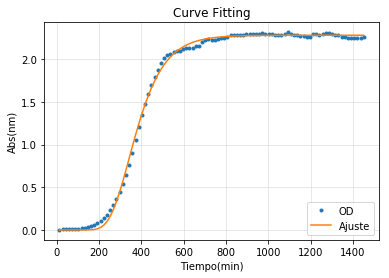

A=2.281066e+00
um=9.170282e-03
l=2.500849e+02
Tm=3.415932e+02
doubpe=7.558625e+01
ext=1.511725e+02
Tfinal=4.927657e+02


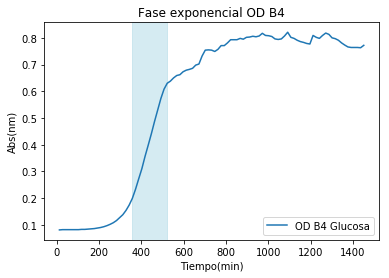

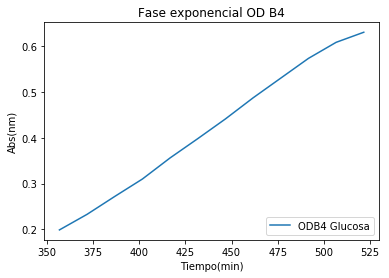

In [170]:
#B4
plt.figure()
y7 = np.log(od7)-np.log(np.min(od7))
evaly, params=Function_fit(tt,y7,0,-1)
A7 = params[0]
um7=params[1]
l7=params[2]
print('A=%e'%(A7))
print('um=%e'%(um7))
print('l=%e'%(l7))

#Cálculo datos para determinar extensión de la fase exponencial
tm7=((A7/(np.exp(1)*um7))+l7)
print('Tm=%e'%(tm7))
t27=((np.log(2))/um7)
print('doubpe=%e'%(t27))
extdp7=2*t27
print('ext=%e'%extdp7)
ttot7=tm7+extdp7
print('Tfinal=%e'%ttot7)

#Delimitación fase exponencial en grafico con OD/tiempo 
y1=tt[23]
y2=tt[34]
plt.figure()
plt.title('Fase exponencial OD B4')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt,od7,label='OD B4 Glucosa')
plt.axvspan(y1,y2, color='lightblue', alpha=0.5)
plt.legend(loc='lower right')

#Fase exponencial OD/tiempo 
plt.figure()
plt.title('Fase exponencial OD B4')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt[23:35],od7[23:35],label='ODB4 Glucosa')
plt.legend(loc='lower right')

[  2.39343421e+00   1.24901004e-02   2.21906971e+02]


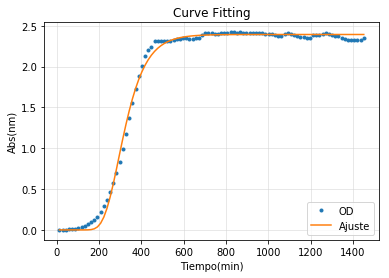

A=2.393434e+00
um=1.249010e-02
l=2.219070e+02
Tm=2.924024e+02
doubpe=5.549573e+01
ext=1.387393e+02
Tfinal=4.311417e+02


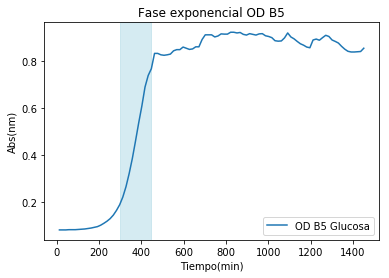

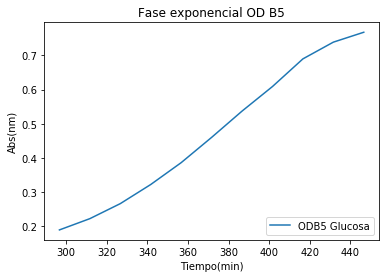

In [171]:
#B5
plt.figure()
y8= np.log(od8)-np.log(np.min(od8))
evaly, params=Function_fit(tt,y8,0,-1)
A8 = params[0]
um8=params[1]
l8=params[2]
print('A=%e'%(A8))
print('um=%e'%(um8))
print('l=%e'%(l8))

#Cálculo datos para determinar extensión de la fase exponencial
tm8=((A8/(np.exp(1)*um8))+l8)
print('Tm=%e'%(tm8))
t28=((np.log(2))/um8)
print('doubpe=%e'%(t28))
extdp8=2.5*t28
print('ext=%e'%extdp8)
ttot8=tm8+extdp8
print('Tfinal=%e'%ttot8)

#Delimitación fase exponencial en grafico con OD/tiempo 
y1=tt[19]
y2=tt[29]
plt.figure()
plt.title('Fase exponencial OD B5')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt,od8,label='OD B5 Glucosa')
plt.axvspan(y1,y2, color='lightblue', alpha=0.5)
plt.legend(loc='lower right')

#Fase exponencial OD/tiempo 
plt.figure()
plt.title('Fase exponencial OD B5')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt[19:30],od8[19:30],label='ODB5 Glucosa')
plt.legend(loc='lower right')

[  2.29569075e+00   9.50501412e-03   1.96934360e+02]


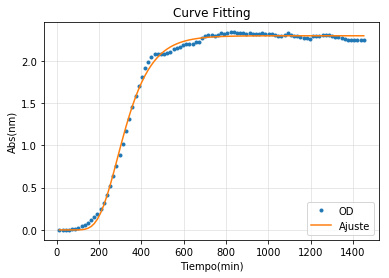

A=2.295691e+00
um=9.505014e-03
l=1.969344e+02
Tm=2.857861e+02
doubpe=7.292437e+01
ext=1.458487e+02
Tfinal=4.316349e+02


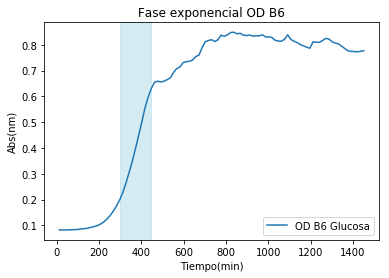

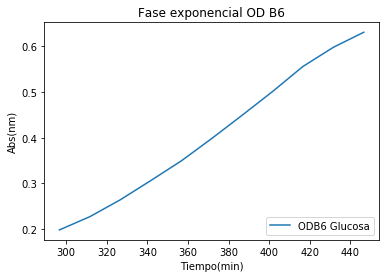

In [172]:
#B6
plt.figure()
y9= np.log(od9)-np.log(np.min(od9))
evaly, params=Function_fit(tt,y9,0,-1)
A9 = params[0]
um9=params[1]
l9=params[2]
print('A=%e'%(A9))
print('um=%e'%(um9))
print('l=%e'%(l9))

#Cálculo datos para determinar extensión de la fase exponencial
tm9=((A9/(np.exp(1)*um9))+l9)
print('Tm=%e'%(tm9))
t29=((np.log(2))/um9)
print('doubpe=%e'%(t29))
extdp9=2*t29
print('ext=%e'%extdp9)
ttot9=tm9+extdp9
print('Tfinal=%e'%ttot9)

#Delimitación fase exponencial en grafico con OD/tiempo 
y1=tt[19]
y2=tt[29]
plt.figure()
plt.title('Fase exponencial OD B6')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt,od9,label='OD B6 Glucosa')
plt.axvspan(y1,y2, color='lightblue', alpha=0.5)
plt.legend(loc='lower right')

#Fase exponencial OD/tiempo 
plt.figure()
plt.title('Fase exponencial OD B6')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt[19:30],od9[19:30],label='ODB6 Glucosa')
plt.legend(loc='lower right')

[  2.42605548e+00   1.07890110e-02   2.23460444e+02]


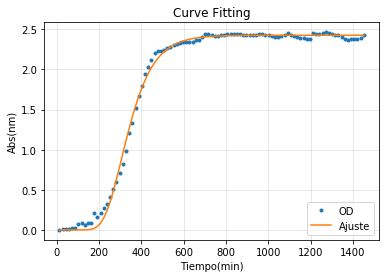

A=2.426055e+00
um=1.078901e-02
l=2.234604e+02
Tm=3.061831e+02
doubpe=6.424566e+01
ext=1.606142e+02
Tfinal=4.667973e+02


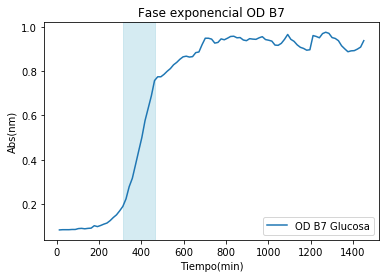

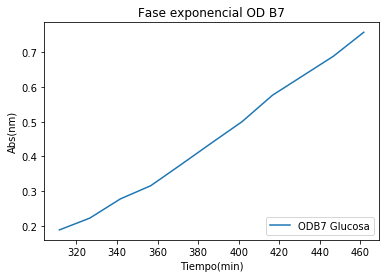

In [173]:
#B7
plt.figure()
y10= np.log(od10)-np.log(np.min(od10))
evaly, params=Function_fit(tt,y10,0,-1)
A10= params[0]
um10=params[1]
l10=params[2]
print('A=%e'%(A10))
print('um=%e'%(um10))
print('l=%e'%(l10))

#Cálculo datos para determinar extensión de la fase exponencial
tm10=((A10/(np.exp(1)*um10))+l10)
print('Tm=%e'%(tm10))
t210=((np.log(2))/um10)
print('doubpe=%e'%(t210))
extdp10=2.5*t210
print('ext=%e'%extdp10)
ttot10=tm10+extdp10
print('Tfinal=%e'%ttot10)

#Delimitación fase exponencial en grafico con OD/tiempo 
y1=tt[20]
y2=tt[30]
plt.figure()
plt.title('Fase exponencial OD B7')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt,od10,label='OD B7 Glucosa')
plt.axvspan(y1,y2, color='lightblue', alpha=0.5)
plt.legend(loc='lower right')

#Fase exponencial OD/tiempo 
plt.figure()
plt.title('Fase exponencial OD B7')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt[20:31],od10[20:31],label='ODB7 Glucosa')
plt.legend(loc='lower right')

In [174]:
#Selección de datos en arrays, según lo determinado
o=odp[18:30]
t=tt[18:30]
cp=cfpp[18:30]
rp=rfpp[18:30]
yp=yfpp[18:30]

#A3
o1=od1[18:30]
c1=cfp1[18:30]
r1=rfp1[18:30]
y1=yfp1[18:30]

#A4
o2=od2[22:35]
c2=cfp2[22:35]
r2=rfp2[22:35]
y2=yfp2[22:35]

#A5
o3=od3[19:32]
c3=cfp3[19:32]
r3=rfp3[19:32]
y3=yfp3[19:32]

#A6
o4=od4[19:29]
c4=cfp4[19:29]
r4=rfp4[19:29]
y4=yfp4[19:29]

#A7
o5=od5[16:27]
c5=cfp5[16:27]
r5=rfp5[16:27]
y5=yfp5[16:27]

#B3
o6=od6[14:25]
c6=cfp6[14:25]
r6=rfp6[14:25]
y6=yfp6[14:25]

#B4
o7=od7[23:35]
c7=cfp7[23:35]
r7=rfp7[23:35]
y7=yfp7[23:35]

#B5
o8=od8[19:30]
c8=cfp8[19:30]
r8=rfp8[19:30]
y8=yfp8[19:30]

#B6
o9=od9[19:30]
c9=cfp9[19:30]
r9=rfp9[19:30]
y9=yfp9[19:30]

#B7
o10=od10[20:31]
c10=cfp10[20:31]
r10=rfp10[20:31]
y10=yfp10[20:31]

#Control
oc=odc[16:27]
cc=cfpc[16:27]
rc=rfpc[16:27]
yc=yfpc[16:27]
tc=tt[16:27]

slope=2.858425e+04
intercept=3.227343e+03
p-value=2.871340e-08
r-squared: 0.959084389787
std_err=1.866994e+03
y=(2.858425e+04)x+(3.227343e+03)


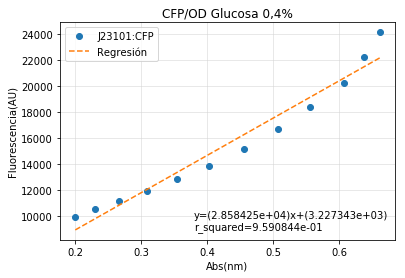

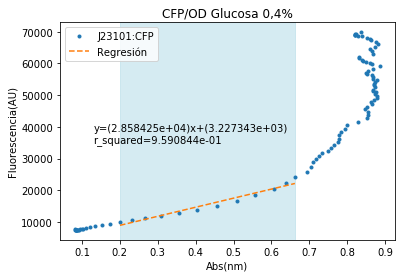

In [175]:
#Regresión lineal, evaluación de regresión con OD, gráfico de regresión (Ejemplo con CFP)
slope, intercept, r_value, p_value,std_err=stats.linregress(o,cp)
slopecp=slope
print('slope=%e'%slopecp)
print('intercept=%e'%intercept)
print('p-value=%e'%p_value)
print("r-squared:",r_value**2)
print('std_err=%e'%std_err)

regcp=((slope*o)+intercept)
print('y=(%e)x+(%e)'%(slope, intercept))
regcpstr=('y=(%e)x+(%e)'%(slope, intercept))
cprval2='r_squared=%e'%(r_value**2)

plt.figure()
plt.title('CFP/OD Glucosa 0,4%')
plt.xlabel('Abs(nm)')
plt.ylabel('Fluorescencia(AU)')
plt.plot(o,cp,'o',label='J23101:CFP')       
plt.plot(o,regcp,'--',label='Regresión')
plt.annotate(str(regcpstr), xy=(0.4, 0.1), xycoords='axes fraction')
plt.annotate(str(cprval2),xy=(0.4,0.05),xycoords='axes fraction')
plt.grid(color='lightgray', linestyle='-', linewidth=0.5)
lgd=plt.legend(loc='upper left')

#Delimitacion datos en CFP/OD (Ejemplo con CFP)
y1=odp[18]
y2=odp[29]
plt.figure()
plt.title('CFP/OD Glucosa 0,4%')
plt.xlabel('Abs(nm)')
plt.ylabel('Fluorescencia(AU)')
plt.plot(odp,cfpp,'.',label='J23101:CFP')
plt.axvspan(y1,y2, color='lightblue', alpha=0.5)
plt.plot(o,regcp,'--',label='Regresión')
plt.annotate(str(regcpstr), xy=(0.1, 0.5), xycoords='axes fraction')
plt.annotate(str(cprval2),xy=(0.1,0.45),xycoords='axes fraction')
plt.legend(loc='upper left')


slope=2.603487e+04
intercept=1.497639e+04
p-value=9.071027e-11
r-squared: 0.987033008642
std_err=9.436463e+02
y=(2.603487e+04)x+(1.497639e+04)


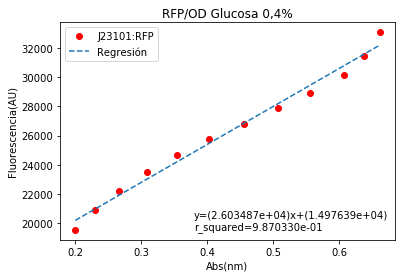

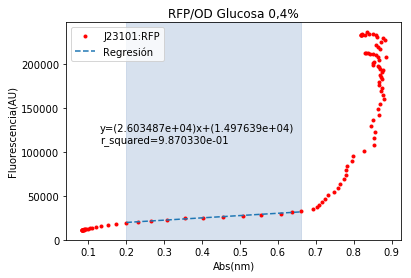

In [176]:
#RFP
slope, intercept, r_value, p_value,std_err=stats.linregress(o,rp)
sloperp=slope
print('slope=%e'%sloperp)
print('intercept=%e'%intercept)
print('p-value=%e'%p_value)
print("r-squared:",r_value**2)
print('std_err=%e'%std_err)

regrp=((slope*o)+intercept)
print('y=(%e)x+(%e)'%(slope, intercept))
regrpstr=('y=(%e)x+(%e)'%(slope, intercept))
rprval2='r_squared=%e'%(r_value**2)

plt.figure()
plt.title('RFP/OD Glucosa 0,4%')
plt.xlabel('Abs(nm)')
plt.ylabel('Fluorescencia(AU)')
plt.plot(o,rp,'ro',label='J23101:RFP')       
plt.plot(o,regrp,'--',label='Regresión')
plt.annotate(str(regrpstr), xy=(0.4, 0.1), xycoords='axes fraction')
plt.annotate(str(rprval2),xy=(0.4,0.05),xycoords='axes fraction')
plt.legend(loc='upper left')


#Delimitacion datos en RFP/OD
y1=odp[18]
y2=odp[29]
plt.figure()
plt.title('RFP/OD Glucosa 0,4%')
plt.xlabel('Abs(nm)')
plt.ylabel('Fluorescencia(AU)')
plt.plot(odp,rfpp,'r.',label='J23101:RFP')
plt.axvspan(y1,y2, color='lightsteelblue', alpha=0.5)
plt.plot(o,regrp,'--',label='Regresión')
plt.annotate(str(regrpstr), xy=(0.1, 0.5), xycoords='axes fraction')
plt.annotate(str(rprval2),xy=(0.1,0.45),xycoords='axes fraction')
plt.legend(loc='upper left')

slope=1.499435e+05
intercept=1.854295e+04
p-value=9.462452e-12
r-squared: 0.991745689402
std_err=4.325814e+03
y=(1.499435e+05)x+(1.854295e+04)


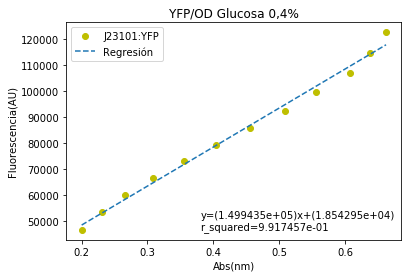

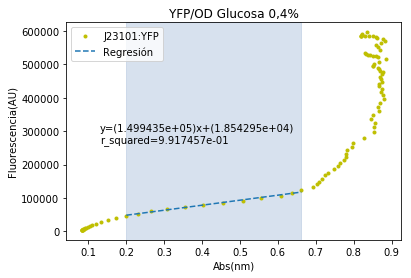

In [177]:
#YFP
slope, intercept, r_value, p_value,std_err=stats.linregress(o,yp)
slopeyp=slope
print('slope=%e'%slopeyp)
print('intercept=%e'%intercept)
print('p-value=%e'%p_value)
print("r-squared:",r_value**2)
print('std_err=%e'%std_err)

regyp=((slope*o)+intercept)
print('y=(%e)x+(%e)'%(slope, intercept))
regypstr=('y=(%e)x+(%e)'%(slope, intercept))
yprval2='r_squared=%e'%(r_value**2)

plt.figure()
plt.title('YFP/OD Glucosa 0,4%')
plt.xlabel('Abs(nm)')
plt.ylabel('Fluorescencia(AU)')
plt.plot(o,yp,'yo',label='J23101:YFP')       
plt.plot(o,regyp,'--',label='Regresión')
plt.annotate(str(regypstr), xy=(0.4, 0.1), xycoords='axes fraction')
plt.annotate(str(yprval2),xy=(0.4,0.05),xycoords='axes fraction')
plt.legend(loc='upper left')


#Delimitacion datos en YFP/OD
y1=odp[18]
y2=odp[29]
plt.figure()
plt.title('YFP/OD Glucosa 0,4%')
plt.xlabel('Abs(nm)')
plt.ylabel('Fluorescencia(AU)')
plt.plot(odp,yfpp,'y.',label='J23101:YFP')
plt.axvspan(y1,y2, color='lightsteelblue', alpha=0.5)
plt.plot(o,regyp,'--',label='Regresión')
plt.annotate(str(regypstr), xy=(0.1, 0.5), xycoords='axes fraction')
plt.annotate(str(yprval2),xy=(0.1,0.45),xycoords='axes fraction')
plt.legend(loc='upper left')


In [178]:
#Selección de datos en arrays, según lo determinado
o=odp[18:30]
t=tt[18:30]
cp=cfpp[18:30]
rp=rfpp[18:30]
yp=yfpp[18:30]

#A3
o1=od1[18:30]
c1=cfp1[18:30]
r1=rfp1[18:30]
y1=yfp1[18:30]

#A4
o2=od2[22:35]
c2=cfp2[22:35]
r2=rfp2[22:35]
y2=yfp2[22:35]

#A5
o3=od3[19:32]
c3=cfp3[19:32]
r3=rfp3[19:32]
y3=yfp3[19:32]

#A6
o4=od4[19:29]
c4=cfp4[19:29]
r4=rfp4[19:29]
y4=yfp4[19:29]

#A7
o5=od5[16:27]
c5=cfp5[16:27]
r5=rfp5[16:27]
y5=yfp5[16:27]

#B3
o6=od6[14:25]
c6=cfp6[14:25]
r6=rfp6[14:25]
y6=yfp6[14:25]

#B4
o7=od7[23:35]
c7=cfp7[23:35]
r7=rfp7[23:35]
y7=yfp7[23:35]

#B5
o8=od8[19:30]
c8=cfp8[19:30]
r8=rfp8[19:30]
y8=yfp8[19:30]

#B6
o9=od9[19:30]
c9=cfp9[19:30]
r9=rfp9[19:30]
y9=yfp9[19:30]

#B7
o10=od10[20:31]
c10=cfp10[20:31]
r10=rfp10[20:31]
y10=yfp10[20:31]

#Control
oc=odc[16:27]
cc=cfpc[16:27]
rc=rfpc[16:27]
yc=yfpc[16:27]
tc=tt[16:27]

In [179]:
#regresion lineal de replicas
#A3
slope, intercept, r_value, p_value,std_err=stats.linregress(o1,c1)
slopec1=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o1,r1)
sloper1=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o1,y1)
slopey1=slope

#A4
slope, intercept, r_value, p_value,std_err=stats.linregress(o2,c2)
slopec2=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o2,r2)
sloper2=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o2,y2)
slopey2=slope
#A5
slope, intercept, r_value, p_value,std_err=stats.linregress(o3,c3)
slopec3=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o3,r3)
sloper3=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o3,y3)
slopey3=slope
#A6
slope, intercept, r_value, p_value,std_err=stats.linregress(o4,c4)
slopec4=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o4,r4)
sloper4=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o4,y4)
slopey4=slope
#A7
slope, intercept, r_value, p_value,std_err=stats.linregress(o5,c5)
slopec5=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o5,r5)
sloper5=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o5,y5)
slopey5=slope
#B3
slope, intercept, r_value, p_value,std_err=stats.linregress(o6,c6)
slopec6=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o6,r6)
sloper6=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o6,y6)
slopey6=slope
#B4
slope, intercept, r_value, p_value,std_err=stats.linregress(o7,c7)
slopec7=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o7,r7)
sloper7=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o7,y7)
slopey7=slope
#B5
slope, intercept, r_value, p_value,std_err=stats.linregress(o8,c8)
slopec8=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o8,r8)
sloper8=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o8,y8)
slopey8=slope
#B6
slope, intercept, r_value, p_value,std_err=stats.linregress(o9,c9)
slopec9=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o9,r9)
sloper9=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o9,y9)
slopey9=slope

#B7
slope, intercept, r_value, p_value,std_err=stats.linregress(o10,c10)
slopec10=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o10,r10)
sloper10=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o10,y10)
slopey10=slope

#Control
slope, intercept, r_value, p_value,std_err=stats.linregress(oc,cc)
slopecc=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(oc,rc)
sloperc=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(oc,yc)
slopeyc=slope

ac [5409.0895016173736, 31026.64682488775, 36372.818719968833, 34771.049380617231, 21684.394670537713, 20871.187778464013, 18188.61377247953, 35843.13980425238, 17525.476382146346, 28883.958821428889, 28287.155935722465]
ar [-1500.3031932571885, 26180.503912764594, 26525.197134004877, 25413.515918080535, 15594.400804196699, 17532.864349695385, 24000.91065511839, 25267.60154988366, 22042.424435794353, 19326.332337545835, 25358.353427538917]
ay [3272.8465795671996, 151539.71366260422, 157772.98759699159, 149994.75819704644, 97364.634307248125, 102880.97680319505, 125564.58689908325, 153500.20998756588, 118103.54112364993, 126985.46382504332, 146622.07393536271]


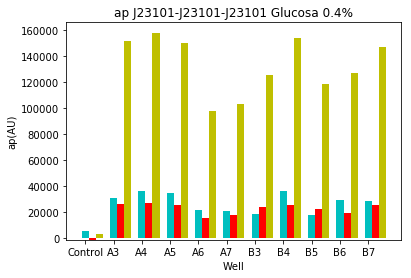

In [180]:
#Grafico de barras pendientes de FPs
pendientesc=[slopecc,slopec1,slopec2,slopec3,slopec4,slopec5,slopec6,slopec7,slopec8,slopec9,slopec10]
pendientesr=[sloperc,sloper1,sloper2,sloper3,sloper4,sloper5,sloper6,sloper7,sloper8,sloper9,sloper10]
pendientesy=[slopeyc,slopey1,slopey2,slopey3,slopey4,slopey5,slopey6,slopey7,slopey8,slopey9,slopey10]
X = np.arange(11)
plt.figure()
plt.title('ap J23101-J23101-J23101 Glucosa 0.4%')
plt.xlabel('Well')
plt.ylabel('ap(AU)')
plt.bar(X[0]+0.00,pendientesc[0],color='c',width=0.25)
plt.bar(X[0]+0.25,pendientesr[0],color='r',width=0.25)
plt.bar(X[0]+0.50,pendientesy[0],color='y',width=0.25)
plt.bar(X[1]+0.00,pendientesc[1],color='c',width=0.25)
plt.bar(X[1]+0.25,pendientesr[1],color='r',width=0.25)
plt.bar(X[1]+0.50,pendientesy[1],color='y',width=0.25)
plt.bar(X[2]+0.00,pendientesc[2],color='c',width=0.25)
plt.bar(X[2]+0.25,pendientesr[2],color='r',width=0.25)
plt.bar(X[2]+0.50,pendientesy[2],color='y',width=0.25)
plt.bar(X[3]+0.00,pendientesc[3],color='c',width=0.25)
plt.bar(X[3]+0.25,pendientesr[3],color='r',width=0.25)
plt.bar(X[3]+0.50,pendientesy[3],color='y',width=0.25)
plt.bar(X[4]+0.00,pendientesc[4],color='c',width=0.25)
plt.bar(X[4]+0.25,pendientesr[4],color='r',width=0.25)
plt.bar(X[4]+0.50,pendientesy[4],color='y',width=0.25)
plt.bar(X[5]+0.00,pendientesc[5],color='c',width=0.25)
plt.bar(X[5]+0.25,pendientesr[5],color='r',width=0.25)
plt.bar(X[5]+0.50,pendientesy[5],color='y',width=0.25)
plt.bar(X[6]+0.00,pendientesc[6],color='c',width=0.25)
plt.bar(X[6]+0.25,pendientesr[6],color='r',width=0.25)
plt.bar(X[6]+0.50,pendientesy[6],color='y',width=0.25)
plt.bar(X[7]+0.00,pendientesc[7],color='c',width=0.25)
plt.bar(X[7]+0.25,pendientesr[7],color='r',width=0.25)
plt.bar(X[7]+0.50,pendientesy[7],color='y',width=0.25)
plt.bar(X[8]+0.00,pendientesc[8],color='c',width=0.25)
plt.bar(X[8]+0.25,pendientesr[8],color='r',width=0.25)
plt.bar(X[8]+0.50,pendientesy[8],color='y',width=0.25)
plt.bar(X[9]+0.00,pendientesc[9],color='c',width=0.25)
plt.bar(X[9]+0.25,pendientesr[9],color='r',width=0.25)
plt.bar(X[9]+0.50,pendientesy[9],color='y',width=0.25)
plt.bar(X[10]+0.00,pendientesc[10],color='c',width=0.25)
plt.bar(X[10]+0.25,pendientesr[10],color='r',width=0.25)
plt.bar(X[10]+0.50,pendientesy[10],color='y',width=0.25)
plt.xticks(X, ['Control',"A3","A4","A5",'A6','A7','B3','B4','B5','B6','B7'])

print('ac',pendientesc)
print('ar',pendientesr)
print('ay',pendientesy)

[28584.252587811487, 26034.872858331677, 149943.48347912478]


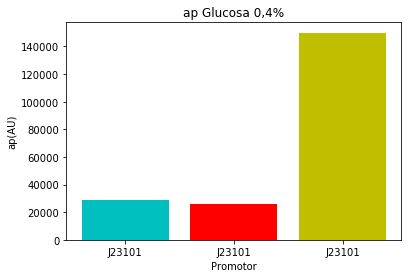

In [181]:
pendientes= [slopecp,sloperp,slopeyp]
X = [1,2,3]
plt.figure()
plt.title('ap Glucosa 0,4%')
plt.xlabel('Promotor')
plt.ylabel('ap(AU)')
plt.bar(X[0],pendientes[0],color='c')
plt.bar(X[1],pendientes[1],color='r')
plt.bar(X[2],pendientes[2],color='y')
plt.xticks(X, ["J23101",'J23101',"J23101"])
print(pendientes)

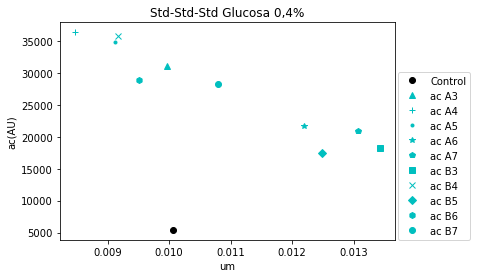

In [182]:
#grafico de ac versus Um
plt.figure()
plt.title('Std-Std-Std Glucosa 0,4%')
plt.xlabel('um')
plt.ylabel('ac(AU)')
plt.plot(umc,slopecc,'ko',label='Control')
plt.plot(um1,slopec1,'c^',label='ac A3')
plt.plot(um2,slopec2,'c+',label='ac A4')
plt.plot(um3,slopec3,'c.',label='ac A5')
plt.plot(um4,slopec4,'c*',label='ac A6')
plt.plot(um5,slopec5,'cp',label='ac A7')
plt.plot(um6,slopec6,'cs',label='ac B3')
plt.plot(um7,slopec7,'cx',label='ac B4')
plt.plot(um8,slopec8,'cD',label='ac B5')
plt.plot(um9,slopec9,'ch',label='ac B6')
plt.plot(um10,slopec10,'co',label='ac B7')
plt.legend(loc=(1.01,0.0))


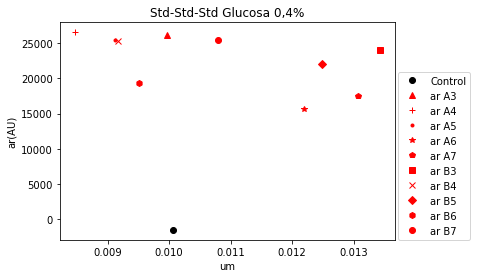

In [183]:
#grafico de ar versus Um
plt.figure()
plt.title('Std-Std-Std Glucosa 0,4%')
plt.xlabel('um')
plt.ylabel('ar(AU)')
plt.plot(umc,sloperc,'ko',label='Control')
plt.plot(um1,sloper1,'r^',label='ar A3')
plt.plot(um2,sloper2,'r+',label='ar A4')
plt.plot(um3,sloper3,'r.',label='ar A5')
plt.plot(um4,sloper4,'r*',label='ar A6')
plt.plot(um5,sloper5,'rp',label='ar A7')
plt.plot(um6,sloper6,'rs',label='ar B3')
plt.plot(um7,sloper7,'rx',label='ar B4')
plt.plot(um8,sloper8,'rD',label='ar B5')
plt.plot(um9,sloper9,'rh',label='ar B6')
plt.plot(um10,sloper10,'ro',label='ar B7')
plt.legend(loc=(1.01,0.0))


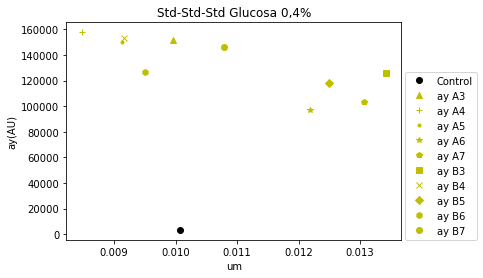

In [184]:
#grafico de ay versus Um
plt.figure()
plt.title('Std-Std-Std Glucosa 0,4%')
plt.xlabel('um')
plt.ylabel('ay(AU)')
plt.plot(umc,slopeyc,'ko',label='Control')
plt.plot(um1,slopey1,'y^',label='ay A3')
plt.plot(um2,slopey2,'y+',label='ay A4')
plt.plot(um3,slopey3,'y.',label='ay A5')
plt.plot(um4,slopey4,'y*',label='ay A6')
plt.plot(um5,slopey5,'yp',label='ay A7')
plt.plot(um6,slopey6,'ys',label='ay B3')
plt.plot(um7,slopey7,'yx',label='ay B4')
plt.plot(um8,slopey8,'yD',label='ay B5')
plt.plot(um9,slopey9,'yh',label='ay B6')
plt.plot(um10,slopey10,'yo',label='ay B7')
plt.legend(loc=(1.01,0.0))

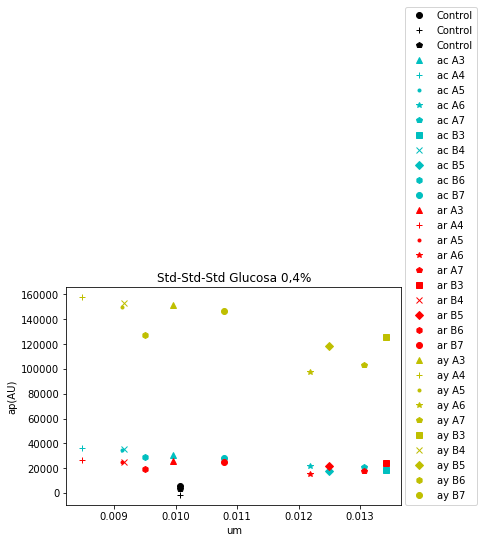

In [185]:
#grafico de ap versus Um
plt.figure()
plt.title('Std-Std-Std Glucosa 0,4%')
plt.xlabel('um')
plt.ylabel('ap(AU)')
plt.plot(umc,slopecc,'ko',label='Control')
plt.plot(umc,sloperc,'k+',label='Control')
plt.plot(umc,slopeyc,'kp',label='Control')
plt.plot(um1,slopec1,'c^',label='ac A3')
plt.plot(um2,slopec2,'c+',label='ac A4')
plt.plot(um3,slopec3,'c.',label='ac A5')
plt.plot(um4,slopec4,'c*',label='ac A6')
plt.plot(um5,slopec5,'cp',label='ac A7')
plt.plot(um6,slopec6,'cs',label='ac B3')
plt.plot(um7,slopec7,'cx',label='ac B4')
plt.plot(um8,slopec8,'cD',label='ac B5')
plt.plot(um9,slopec9,'ch',label='ac B6')
plt.plot(um10,slopec10,'co',label='ac B7')
plt.plot(um1,sloper1,'r^',label='ar A3')
plt.plot(um2,sloper2,'r+',label='ar A4')
plt.plot(um3,sloper3,'r.',label='ar A5')
plt.plot(um4,sloper4,'r*',label='ar A6')
plt.plot(um5,sloper5,'rp',label='ar A7')
plt.plot(um6,sloper6,'rs',label='ar B3')
plt.plot(um7,sloper7,'rx',label='ar B4')
plt.plot(um8,sloper8,'rD',label='ar B5')
plt.plot(um9,sloper9,'rh',label='ar B6')
plt.plot(um10,sloper10,'ro',label='ar B7')
plt.plot(um1,slopey1,'y^',label='ay A3')
plt.plot(um2,slopey2,'y+',label='ay A4')
plt.plot(um3,slopey3,'y.',label='ay A5')
plt.plot(um4,slopey4,'y*',label='ay A6')
plt.plot(um5,slopey5,'yp',label='ay A7')
plt.plot(um6,slopey6,'ys',label='ay B3')
plt.plot(um7,slopey7,'yx',label='ay B4')
plt.plot(um8,slopey8,'yD',label='ay B5')
plt.plot(um9,slopey9,'yh',label='ay B6')
plt.plot(um10,slopey10,'yo',label='ay B7')
plt.legend(loc=(1.01,0.0))

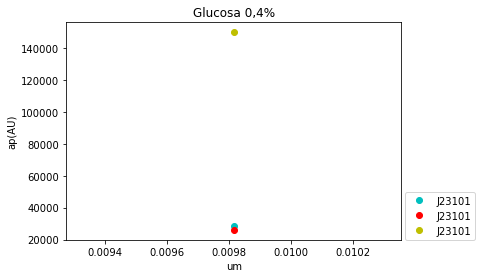

In [186]:
#grafico de ap prom versus Um
plt.figure()
plt.title('Glucosa 0,4%')
plt.xlabel('um')
plt.ylabel('ap(AU)')
plt.plot(um,slopecp,'co',label='J23101')
plt.plot(um,sloperp,'ro',label='J23101')
plt.plot(um,slopeyp,'yo',label='J23101')
plt.legend(loc=(1.01,0.0))

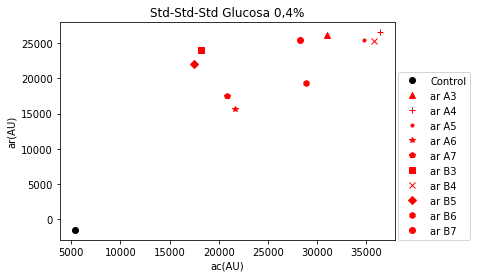

In [187]:
#grafico de ar versus ac
plt.figure()
plt.title('Std-Std-Std Glucosa 0,4%')
plt.xlabel('ac(AU)')
plt.ylabel('ar(AU)')
plt.plot(slopecc,sloperc,'ko',label='Control')
plt.plot(slopec1,sloper1,'r^',label='ar A3')
plt.plot(slopec2,sloper2,'r+',label='ar A4')
plt.plot(slopec3,sloper3,'r.',label='ar A5')
plt.plot(slopec4,sloper4,'r*',label='ar A6')
plt.plot(slopec5,sloper5,'rp',label='ar A7')
plt.plot(slopec6,sloper6,'rs',label='ar B3')
plt.plot(slopec7,sloper7,'rx',label='ar B4')
plt.plot(slopec8,sloper8,'rD',label='ar B5')
plt.plot(slopec9,sloper9,'rh',label='ar B6')
plt.plot(slopec10,sloper10,'ro',label='ar B7')
plt.legend(loc=(1.01,0.0))

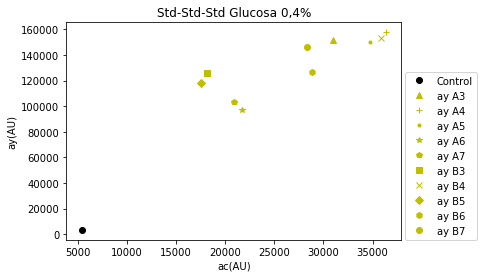

In [188]:
#grafico de ay versus ac
plt.figure()
plt.title('Std-Std-Std Glucosa 0,4%')
plt.xlabel('ac(AU)')
plt.ylabel('ay(AU)')
plt.plot(slopecc,slopeyc,'ko',label='Control')
plt.plot(slopec1,slopey1,'y^',label='ay A3')
plt.plot(slopec2,slopey2,'y+',label='ay A4')
plt.plot(slopec3,slopey3,'y.',label='ay A5')
plt.plot(slopec4,slopey4,'y*',label='ay A6')
plt.plot(slopec5,slopey5,'yp',label='ay A7')
plt.plot(slopec6,slopey6,'ys',label='ay B3')
plt.plot(slopec7,slopey7,'yx',label='ay B4')
plt.plot(slopec8,slopey8,'yD',label='ay B5')
plt.plot(slopec9,slopey9,'yh',label='ay B6')
plt.plot(slopec10,slopey10,'yo',label='ay B7')
plt.legend(loc=(1.01,0.0))

um [0.010064966581991649, 0.0099613418200504237, 0.0084753295924377241, 0.0091266378339810161, 0.012192366744288143, 0.013061297515209706, 0.013420007690925577, 0.0091702816101523286, 0.012490100443058184, 0.0095050141179462855, 0.010789011040220727]


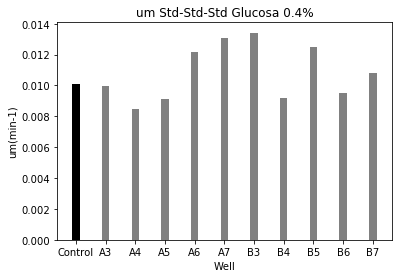

In [189]:
#Grafico de barras um de FPs
ums=[umc,um1,um2,um3,um4,um5,um6,um7,um8,um9,um10]
X = np.arange(11)
plt.figure()
plt.title('um Std-Std-Std Glucosa 0.4%')
plt.xlabel('Well')
plt.ylabel('um(min-1)')
plt.bar(X[0]+0.00,ums[0],color='k',width=0.25)
plt.bar(X[1]+0.00,ums[1],color='grey',width=0.25)
plt.bar(X[2]+0.00,ums[2],color='grey',width=0.25)
plt.bar(X[3]+0.00,ums[3],color='grey',width=0.25)
plt.bar(X[4]+0.00,ums[4],color='grey',width=0.25)
plt.bar(X[5]+0.00,ums[5],color='grey',width=0.25)
plt.bar(X[6]+0.00,ums[6],color='grey',width=0.25)
plt.bar(X[7]+0.00,ums[7],color='grey',width=0.25)
plt.bar(X[8]+0.00,ums[8],color='grey',width=0.25)
plt.bar(X[9]+0.00,ums[9],color='grey',width=0.25)
plt.bar(X[10]+0.00,ums[10],color='grey',width=0.25)
plt.xticks(X, ['Control',"A3","A4","A5",'A6','A7','B3','B4','B5','B6','B7'])
print('um',ums)

In [190]:
#Calculo de ro para cada réplica
pendientesc=[slopecp,slopecc,slopec1,slopec2,slopec3,slopec4,slopec5,slopec6,slopec7,slopec8,slopec9,slopec10]
pendientesr=[sloperp,sloperc,sloper1,sloper2,sloper3,sloper4,sloper5,sloper6,sloper7,sloper8,sloper9,sloper10]
pendientesy=[slopeyp,slopeyc,slopey1,slopey2,slopey3,slopey4,slopey5,slopey6,slopey7,slopey8,slopey9,slopey10]
#Ro RFP 
pr1=sloper1/slopec1
pr2=sloper2/slopec2
pr3=sloper3/slopec3
pr4=sloper4/slopec4
pr5=sloper5/slopec5
pr6=sloper6/slopec6
pr7=sloper7/slopec7
pr8=sloper8/slopec8
pr9=sloper9/slopec9
pr10=sloper10/slopec10
prp=sloperp/slopecp
prc=sloperc/slopecc

#Ro YFP
py1=slopey1/slopec1
py2=slopey2/slopec2
py3=slopey3/slopec3
py4=slopey4/slopec4
py5=slopey5/slopec5
py6=slopey6/slopec6
py7=slopey7/slopec7
py8=slopey8/slopec8
py9=slopey9/slopec9
py10=slopey10/slopec10
pyp=slopeyp/slopecp
pyc=slopeyc/slopecc

ro_rfp=[prc,pr1,pr2,pr3,pr4,pr5,pr6,pr7,pr8,pr9,pr10]
ro_yfp=[pyc,py1,py2,py3,py4,py5,py6,py7,py8,py9,py10]


pr [-0.27736704907703641, 0.84380706882459933, 0.72925877255265981, 0.73088147671053727, 0.71915315327591767, 0.84005110469978683, 1.319556891764518, 0.70494944605511223, 1.2577361068626665, 0.66910261356582845, 0.89646175406114592]
py [0.60506423097428585, 4.8841795414723315, 4.3376618351102261, 4.3137828989613265, 4.4900785005327402, 4.9293302276429634, 6.9034720550870157, 4.2825547880533286, 6.738963241191267, 4.396400943863461, 5.1833444927632639]


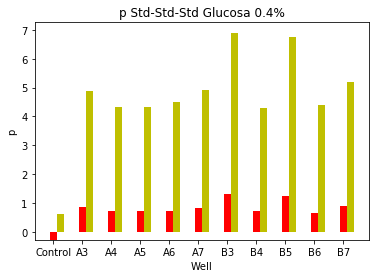

In [191]:
#grafico ro de yfp y de rfp
ro_rfp=[prc,pr1,pr2,pr3,pr4,pr5,pr6,pr7,pr8,pr9,pr10]
ro_yfp=[pyc,py1,py2,py3,py4,py5,py6,py7,py8,py9,py10]
X = np.arange(11)
plt.figure()
plt.title('p Std-Std-Std Glucosa 0.4%')
plt.xlabel('Well')
plt.ylabel('p')
plt.bar(X[0]+0.00,ro_rfp[0],color='r',width=0.25)
plt.bar(X[0]+0.25,ro_yfp[0],color='y',width=0.25)
plt.bar(X[1]+0.00,ro_rfp[1],color='r',width=0.25)
plt.bar(X[1]+0.25,ro_yfp[1],color='y',width=0.25)
plt.bar(X[2]+0.00,ro_rfp[2],color='r',width=0.25)
plt.bar(X[2]+0.25,ro_yfp[2],color='y',width=0.25)
plt.bar(X[3]+0.00,ro_rfp[3],color='r',width=0.25)
plt.bar(X[3]+0.25,ro_yfp[3],color='y',width=0.25)
plt.bar(X[4]+0.00,ro_rfp[4],color='r',width=0.25)
plt.bar(X[4]+0.25,ro_yfp[4],color='y',width=0.25)
plt.bar(X[5]+0.00,ro_rfp[5],color='r',width=0.25)
plt.bar(X[5]+0.25,ro_yfp[5],color='y',width=0.25)
plt.bar(X[6]+0.00,ro_rfp[6],color='r',width=0.25)
plt.bar(X[6]+0.25,ro_yfp[6],color='y',width=0.25)
plt.bar(X[7]+0.00,ro_rfp[7],color='r',width=0.25)
plt.bar(X[7]+0.25,ro_yfp[7],color='y',width=0.25)
plt.bar(X[8]+0.00,ro_rfp[8],color='r',width=0.25)
plt.bar(X[8]+0.25,ro_yfp[8],color='y',width=0.25)
plt.bar(X[9]+0.00,ro_rfp[9],color='r',width=0.25)
plt.bar(X[9]+0.25,ro_yfp[9],color='y',width=0.25)
plt.bar(X[10]+0.00,ro_rfp[10],color='r',width=0.25)
plt.bar(X[10]+0.25,ro_yfp[10],color='y',width=0.25)
plt.xticks(X, ['Control',"A3","A4","A5",'A6','A7','B3','B4','B5','B6','B7'])

print('pr',ro_rfp)
print('py',ro_yfp)

A=2.348359e+00
um=9.961342e-03
l=1.927652e+02


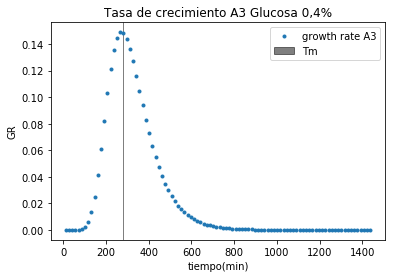

In [221]:
#tasas de crecimiento por réplica, control y promedio
#A3
print('A=%e'%(A1))
print('um=%e'%(um1))
print('l=%e'%(l1))
y1=((A1*np.exp(-np.exp((((um1*np.exp(1))/A1)*(l1-tt))+1))))
#Con diff
dy1=(np.diff(y1))
plt.figure()
plt.title('Tasa de crecimiento A3 Glucosa 0,4%')
plt.xlabel('tiempo(min)')
plt.ylabel('GR')
plt.axvspan(tm1,tm1, color='k', alpha=0.5, label="Tm")
plt.plot(tt[:-1],dy1,'.',label='growth rate A3')
plt.legend(loc='upper right')

A=2.246164e+00
um=8.475330e-03
l=2.355284e+02


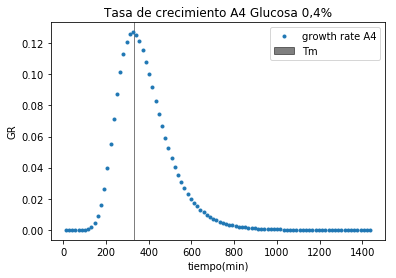

In [223]:
#tasa de crecimiento
#A4
print('A=%e'%(A2))
print('um=%e'%(um2))
print('l=%e'%(l2))
y2=((A2*np.exp(-np.exp((((um2*np.exp(1))/A2)*(l2-tt))+1))))
#Con diff
dy2=(np.diff(y2))
plt.figure()
plt.title('Tasa de crecimiento A4 Glucosa 0,4%')
plt.xlabel('tiempo(min)')
plt.ylabel('GR')
plt.axvspan(tm2,tm2, color='k', alpha=0.5,label="Tm")
plt.plot(tt[:-1],dy2,'.',label='growth rate A4')
plt.legend(loc='upper right')

A=2.344901e+00
um=9.126638e-03
l=2.003351e+02


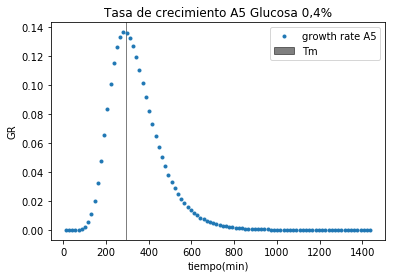

In [224]:
#tasa de crecimiento
#A5
print('A=%e'%(A3))
print('um=%e'%(um3))
print('l=%e'%(l3))
y3=((A3*np.exp(-np.exp((((um3*np.exp(1))/A3)*(l3-tt))+1))))
#Con diff
dy3=(np.diff(y3))
plt.figure()
plt.title('Tasa de crecimiento A5 Glucosa 0,4%')
plt.xlabel('tiempo(min)')
plt.ylabel('GR')
plt.axvspan(tm3,tm3, color='k', alpha=0.5,label="Tm")
plt.plot(tt[:-1],dy3,'.',label='growth rate A5')
plt.legend(loc='upper right')

A=2.384481e+00
um=1.219237e-02
l=2.001409e+02


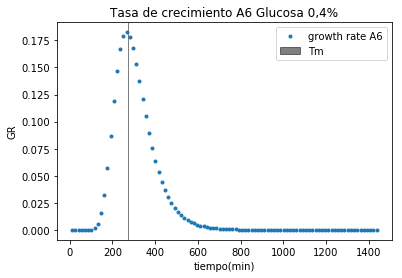

In [226]:
#tasa de crecimiento
#A6
print('A=%e'%(A4))
print('um=%e'%(um4))
print('l=%e'%(l4))
y4=((A4*np.exp(-np.exp((((um4*np.exp(1))/A4)*(l4-tt))+1))))
#Con diff
dy4=(np.diff(y4))
plt.figure()
plt.title('Tasa de crecimiento A6 Glucosa 0,4%')
plt.xlabel('tiempo(min)')
plt.ylabel('GR')
plt.axvspan(tm4,tm4, color='k', alpha=0.5,label="Tm")
plt.plot(tt[:-1],dy4,'.',label='growth rate A6')
plt.legend(loc='upper right')

A=2.310025e+00
um=1.306130e-02
l=1.770868e+02


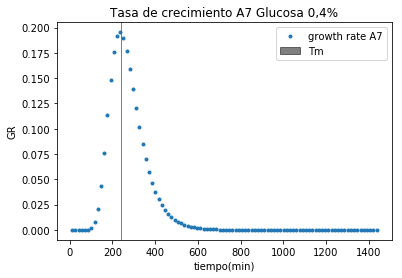

In [227]:
#tasa de crecimiento
#A7
print('A=%e'%(A5))
print('um=%e'%(um5))
print('l=%e'%(l5))
y5=((A5*np.exp(-np.exp((((um5*np.exp(1))/A5)*(l5-tt))+1))))
#Con diff
dy5=(np.diff(y5))
plt.figure()
plt.title('Tasa de crecimiento A7 Glucosa 0,4%')
plt.xlabel('tiempo(min)')
plt.ylabel('GR')
plt.axvspan(tm5,tm5, color='k', alpha=0.5,label="Tm")
plt.plot(tt[:-1],dy5,'.',label='growth rate A7')
plt.legend(loc='upper right')

A=2.361139e+00
um=1.342001e-02
l=1.543666e+02


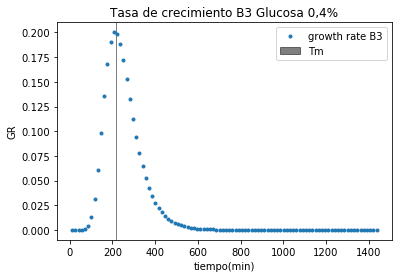

In [228]:
#tasa de crecimiento
#B3
print('A=%e'%(A6))
print('um=%e'%(um6))
print('l=%e'%(l6))
y6=((A6*np.exp(-np.exp((((um6*np.exp(1))/A6)*(l6-tt))+1))))
#Con diff
dy6=(np.diff(y6))
plt.figure()
plt.title('Tasa de crecimiento B3 Glucosa 0,4%')
plt.xlabel('tiempo(min)')
plt.ylabel('GR')
plt.axvspan(tm6,tm6, color='k', alpha=0.5,label="Tm")
plt.plot(tt[:-1],dy6,'.',label='growth rate B3')
plt.legend(loc='upper right')

A=2.281066e+00
um=9.170282e-03
l=2.500849e+02


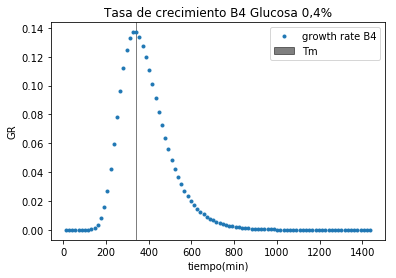

In [229]:
#tasa de crecimiento
#B4
print('A=%e'%(A7))
print('um=%e'%(um7))
print('l=%e'%(l7))
y7=((A7*np.exp(-np.exp((((um7*np.exp(1))/A7)*(l7-tt))+1))))
#Con diff
dy7=(np.diff(y7))
plt.figure()
plt.title('Tasa de crecimiento B4 Glucosa 0,4%')
plt.xlabel('tiempo(min)')
plt.ylabel('GR')
plt.axvspan(tm7,tm7, color='k', alpha=0.5,label="Tm")
plt.plot(tt[:-1],dy7,'.',label='growth rate B4')
plt.legend(loc='upper right')

A=2.393434e+00
um=1.249010e-02
l=2.219070e+02


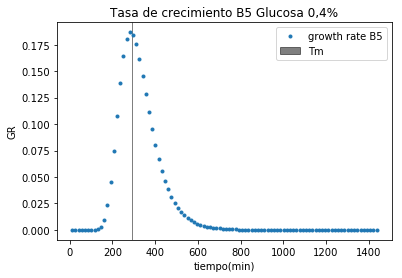

In [230]:
#tasa de crecimiento
#B5
print('A=%e'%(A8))
print('um=%e'%(um8))
print('l=%e'%(l8))
y8=((A8*np.exp(-np.exp((((um8*np.exp(1))/A8)*(l8-tt))+1))))
#Con diff
dy8=np.diff(y8)
plt.figure()
plt.title('Tasa de crecimiento B5 Glucosa 0,4%')
plt.xlabel('tiempo(min)')
plt.ylabel('GR')
plt.axvspan(tm8,tm8, color='k', alpha=0.5,label="Tm")
plt.plot(tt[:-1],dy8,'.',label='growth rate B5')
plt.legend(loc='upper right')

A=2.295691e+00
um=9.505014e-03
l=1.969344e+02


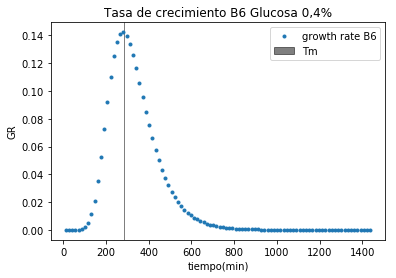

In [231]:
#tasa de crecimiento
#B6
print('A=%e'%(A9))
print('um=%e'%(um9))
print('l=%e'%(l9))
y9=((A9*np.exp(-np.exp((((um9*np.exp(1))/A9)*(l9-tt))+1))))
#Con diff
dy9=np.diff(y9)
plt.figure()
plt.title('Tasa de crecimiento B6 Glucosa 0,4%')
plt.xlabel('tiempo(min)')
plt.ylabel('GR')
plt.axvspan(tm9,tm9, color='k', alpha=0.5,label="Tm")
plt.plot(tt[:-1],dy9,'.',label='growth rate B6')
plt.legend(loc='upper right')

A=2.426055e+00
um=1.078901e-02
l=2.234604e+02


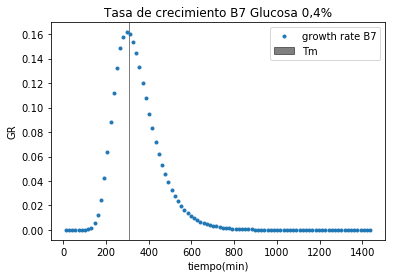

In [232]:
#tasa de crecimiento
#B7
print('A=%e'%(A10))
print('um=%e'%(um10))
print('l=%e'%(l10))
y10=((A10*np.exp(-np.exp((((um10*np.exp(1))/A10)*(l10-tt))+1))))
#Con diff
dy10=np.diff(y10)
plt.figure()
plt.title('Tasa de crecimiento B7 Glucosa 0,4%')
plt.xlabel('tiempo(min)')
plt.ylabel('GR')
plt.axvspan(tm10,tm10, color='k', alpha=0.5,label="Tm")
plt.plot(tt[:-1],dy10,'.',label='growth rate B7')
plt.legend(loc='upper right')

A=2.279870e+00
um=1.006497e-02
l=1.556934e+02


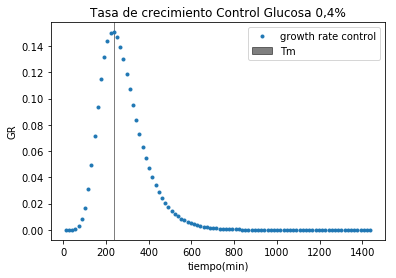

In [233]:
#tasa de crecimiento
#control
print('A=%e'%(Ac))
print('um=%e'%(umc))
print('l=%e'%(lc))
yc=((Ac*np.exp(-np.exp((((umc*np.exp(1))/Ac)*(lc-tt))+1))))
#Con diff
dyc=np.diff(yc)
plt.figure()
plt.title('Tasa de crecimiento Control Glucosa 0,4%')
plt.xlabel('tiempo(min)')
plt.ylabel('GR')
plt.axvspan(tmc,tmc, color='k', alpha=0.5,label="Tm")
plt.plot(tt[:-1],dyc,'.',label='growth rate control')
plt.legend(loc='upper right')

A=2.339323e+00
um=9.815492e-03
l=1.865075e+02


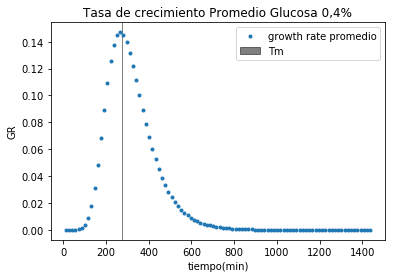

In [234]:
#tasa de crecimiento
#Promedio
print('A=%e'%(A))
print('um=%e'%(um))
print('l=%e'%(l))
y=((A*np.exp(-np.exp((((um*np.exp(1))/A)*(l-tt))+1))))
#Con diff
dy=np.diff(y)
plt.figure()
plt.title('Tasa de crecimiento Promedio Glucosa 0,4%')
plt.xlabel('tiempo(min)')
plt.ylabel('GR')
plt.axvspan(tm,tm, color='k', alpha=0.5,label="Tm")
plt.plot(tt[:-1],dy,'.',label='growth rate promedio')
plt.legend(loc='upper right')

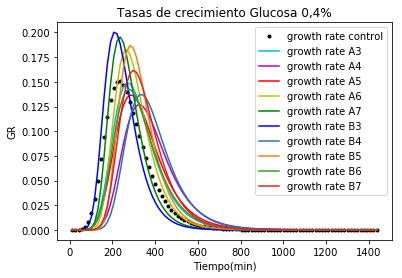

In [235]:
plt.figure()
plt.title('Tasas de crecimiento Glucosa 0,4%')
plt.xlabel('Tiempo(min)')
plt.ylabel('GR')
plt.plot(tt[:-1],dyc,'k.',label='growth rate control')
plt.plot(tt[:-1],dy1,'c',label='growth rate A3')
plt.plot(tt[:-1],dy2,'m',label='growth rate A4')
plt.plot(tt[:-1],dy3,'r',label='growth rate A5')
plt.plot(tt[:-1],dy4,'y',label='growth rate A6')
plt.plot(tt[:-1],dy5,'g',label='growth rate A7')
plt.plot(tt[:-1],dy6,'b',label='growth rate B3')
plt.plot(tt[:-1],dy7,label='growth rate B4')
plt.plot(tt[:-1],dy8,label='growth rate B5')
plt.plot(tt[:-1],dy9,label='growth rate B6')
plt.plot(tt[:-1],dy10,label='growth rate B7')
plt.legend(loc='upper right')

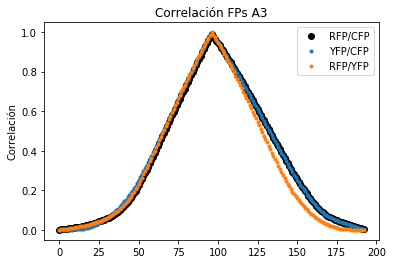

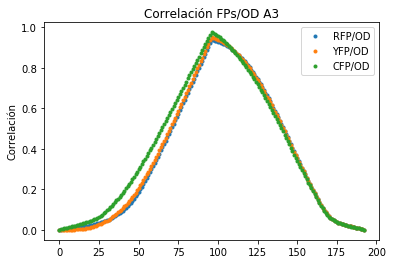

In [236]:
#Correlacion A3
from scipy import signal

ccr1=signal.correlate(rfp1,cfp1)
rf1=np.sqrt(np.sum(rfp1*rfp1))
cf1=np.sqrt(np.sum(cfp1*cfp1))
nccr1= ccr1/(rf1*cf1)

cyc1=signal.correlate(yfp1,cfp1)
yf1=np.sqrt(np.sum(yfp1*yfp1))
ncyc1= cyc1/(yf1*cf1)

cry1=signal.correlate(rfp1,yfp1)
ncry1= cry1/(rf1*yf1)

cro1=signal.correlate(rfp1,od1)
of1=np.sqrt(np.sum(od1*od1))
ncro1= cro1/(rf1*of1)

cyo1=signal.correlate(yfp1,od1)
ncyo1= cyo1/(yf1*of1)

cco1=signal.correlate(cfp1,od1)
ncco1= cco1/(cf1*of1)

plt.figure()
plt.title('Correlación FPs A3')
plt.xlabel('')
#plt.yscale('log')
plt.ylabel('Correlación')
plt.plot(nccr1,'ko',label='RFP/CFP')
plt.plot(ncyc1,'.',label='YFP/CFP')
plt.plot(ncry1,'.',label='RFP/YFP')
plt.legend()

plt.figure()
plt.title('Correlación FPs/OD A3')
plt.xlabel('')
#plt.yscale('log')
plt.ylabel('Correlación')
plt.plot(ncro1,'.',label='RFP/OD')
plt.plot(ncyo1,'.',label='YFP/OD')
plt.plot(ncco1,'.',label='CFP/OD')
plt.legend()

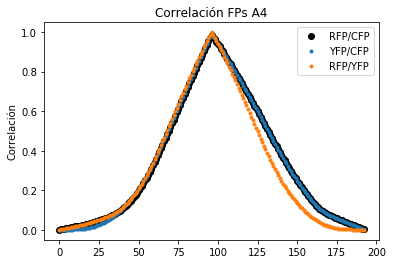

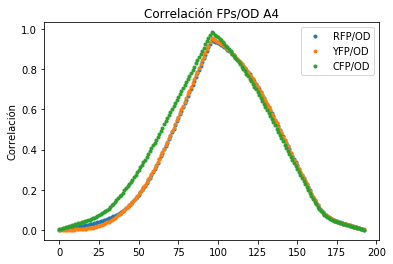

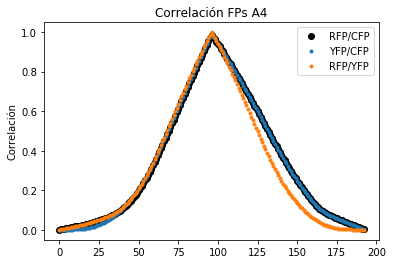

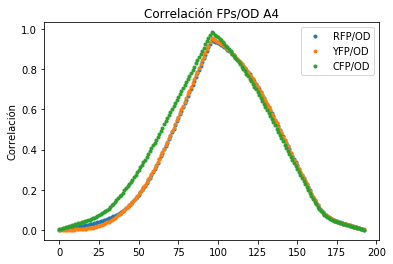

In [237]:
#Correlacion A4
from scipy import signal

ccr2=signal.correlate(rfp2,cfp2)
rf2=np.sqrt(np.sum(rfp2*rfp2))
cf2=np.sqrt(np.sum(cfp2*cfp2))
nccr2= ccr2/(rf2*cf2)

cyc2=signal.correlate(yfp2,cfp2)
yf2=np.sqrt(np.sum(yfp2*yfp2))
ncyc2= cyc2/(yf2*cf2)

cry2=signal.correlate(rfp2,yfp2)
ncry2= cry2/(rf2*yf2)

cro2=signal.correlate(rfp2,od2)
of2=np.sqrt(np.sum(od2*od2))
ncro2= cro2/(rf2*of2)
ccr2=signal.correlate(rfp2,cfp2)
rf2=np.sqrt(np.sum(rfp2*rfp2))
cf2=np.sqrt(np.sum(cfp2*cfp2))
nccr2= ccr2/(rf2*cf2)

cyc2=signal.correlate(yfp2,cfp2)
yf2=np.sqrt(np.sum(yfp2*yfp2))
ncyc2= cyc2/(yf2*cf2)

cry2=signal.correlate(rfp2,yfp2)
ncry2= cry2/(rf2*yf2)

cro2=signal.correlate(rfp2,od2)
of2=np.sqrt(np.sum(od2*od2))
ncro2= cro2/(rf2*of2)

cyo2=signal.correlate(yfp2,od2)
ncyo2= cyo2/(yf2*of2)

cco2=signal.correlate(cfp2,od2)
ncco2= cco2/(cf2*of2)

plt.figure()
plt.title('Correlación FPs A4')
plt.xlabel('')
#plt.yscale('log')
plt.ylabel('Correlación')
plt.plot(nccr2,'ko',label='RFP/CFP')
plt.plot(ncyc2,'.',label='YFP/CFP')
plt.plot(ncry2,'.',label='RFP/YFP')
plt.legend()

plt.figure()
plt.title('Correlación FPs/OD A4')
plt.xlabel('')
#plt.yscale('log')
plt.ylabel('Correlación')
plt.plot(ncro2,'.',label='RFP/OD')
plt.plot(ncyo2,'.',label='YFP/OD')
plt.plot(ncco2,'.',label='CFP/OD')
plt.legend()

cyo2=signal.correlate(yfp2,od2)
ncyo2= cyo2/(yf2*of2)

cco2=signal.correlate(cfp2,od2)
ncco2= cco2/(cf2*of2)

plt.figure()
plt.title('Correlación FPs A4')
plt.xlabel('')
#plt.yscale('log')
plt.ylabel('Correlación')
plt.plot(nccr2,'ko',label='RFP/CFP')
plt.plot(ncyc2,'.',label='YFP/CFP')
plt.plot(ncry2,'.',label='RFP/YFP')
plt.legend()

plt.figure()
plt.title('Correlación FPs/OD A4')
plt.xlabel('')
#plt.yscale('log')
plt.ylabel('Correlación')
plt.plot(ncro2,'.',label='RFP/OD')
plt.plot(ncyo2,'.',label='YFP/OD')
plt.plot(ncco2,'.',label='CFP/OD')
plt.legend()

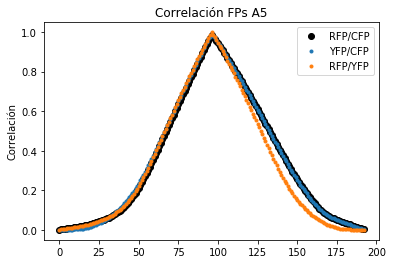

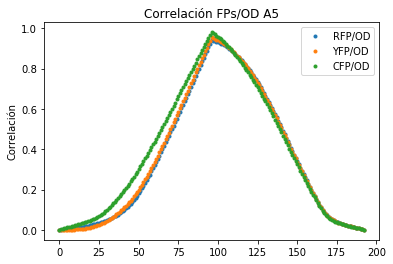

In [238]:
#Correlacion A5
from scipy import signal

ccr3=signal.correlate(rfp3,cfp3)
rf3=np.sqrt(np.sum(rfp3*rfp3))
cf3=np.sqrt(np.sum(cfp3*cfp3))
nccr3= ccr3/(rf3*cf3)

cyc3=signal.correlate(yfp3,cfp3)
yf3=np.sqrt(np.sum(yfp3*yfp3))
ncyc3= cyc3/(yf3*cf3)

cry3=signal.correlate(rfp3,yfp3)
ncry3= cry3/(rf3*yf3)

cro3=signal.correlate(rfp3,od3)
of3=np.sqrt(np.sum(od3*od3))
ncro3= cro3/(rf3*of3)

cyo3=signal.correlate(yfp3,od3)
ncyo3= cyo3/(yf3*of3)

cco3=signal.correlate(cfp3,od3)
ncco3= cco3/(cf3*of3)

plt.figure()
plt.title('Correlación FPs A5')
plt.xlabel('')
#plt.yscale('log')
plt.ylabel('Correlación')
plt.plot(nccr3,'ko',label='RFP/CFP')
plt.plot(ncyc3,'.',label='YFP/CFP')
plt.plot(ncry3,'.',label='RFP/YFP')
plt.legend()

plt.figure()
plt.title('Correlación FPs/OD A5')
plt.xlabel('')
#plt.yscale('log')
plt.ylabel('Correlación')
plt.plot(ncro3,'.',label='RFP/OD')
plt.plot(ncyo3,'.',label='YFP/OD')
plt.plot(ncco3,'.',label='CFP/OD')
plt.legend()

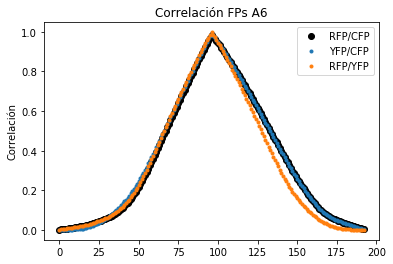

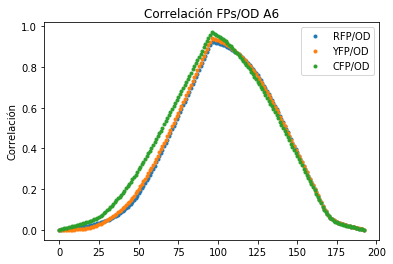

In [239]:
#Correlacion A6
from scipy import signal

ccr4=signal.correlate(rfp4,cfp4)
rf4=np.sqrt(np.sum(rfp4*rfp4))
cf4=np.sqrt(np.sum(cfp4*cfp4))
nccr4= ccr4/(rf4*cf4)

cyc4=signal.correlate(yfp4,cfp4)
yf4=np.sqrt(np.sum(yfp4*yfp4))
ncyc4= cyc4/(yf4*cf4)

cry4=signal.correlate(rfp4,yfp4)
ncry4= cry4/(rf4*yf4)

cro4=signal.correlate(rfp4,od4)
of4=np.sqrt(np.sum(od4*od4))
ncro4= cro4/(rf4*of4)

cyo4=signal.correlate(yfp4,od4)
ncyo4= cyo4/(yf4*of4)

cco4=signal.correlate(cfp4,od4)
ncco4= cco4/(cf4*of4)

plt.figure()
plt.title('Correlación FPs A6')
plt.xlabel('')
#plt.yscale('log')
plt.ylabel('Correlación')
plt.plot(nccr4,'ko',label='RFP/CFP')
plt.plot(ncyc4,'.',label='YFP/CFP')
plt.plot(ncry4,'.',label='RFP/YFP')
plt.legend()

plt.figure()
plt.title('Correlación FPs/OD A6')
plt.xlabel('')
#plt.yscale('log')
plt.ylabel('Correlación')
plt.plot(ncro4,'.',label='RFP/OD')
plt.plot(ncyo4,'.',label='YFP/OD')
plt.plot(ncco4,'.',label='CFP/OD')
plt.legend()

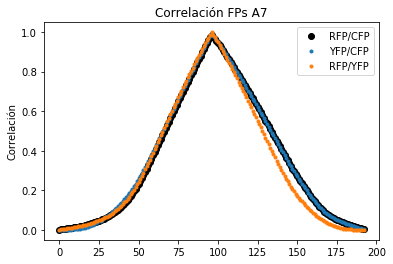

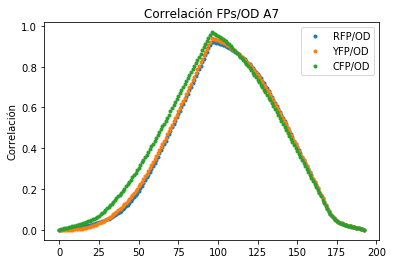

In [240]:
#Correlacion A7
from scipy import signal

ccr5=signal.correlate(rfp5,cfp5)
rf5=np.sqrt(np.sum(rfp5*rfp5))
cf5=np.sqrt(np.sum(cfp5*cfp5))
nccr5= ccr5/(rf5*cf5)

cyc5=signal.correlate(yfp5,cfp5)
yf5=np.sqrt(np.sum(yfp5*yfp5))
ncyc5= cyc5/(yf5*cf5)

cry5=signal.correlate(rfp5,yfp5)
ncry5= cry5/(rf5*yf5)

cro5=signal.correlate(rfp5,od5)
of5=np.sqrt(np.sum(od5*od5))
ncro5= cro5/(rf5*of5)

cyo5=signal.correlate(yfp5,od5)
ncyo5= cyo5/(yf5*of5)

cco5=signal.correlate(cfp5,od5)
ncco5= cco5/(cf5*of5)

plt.figure()
plt.title('Correlación FPs A7')
plt.xlabel('')
#plt.yscale('log')
plt.ylabel('Correlación')
plt.plot(nccr5,'ko',label='RFP/CFP')
plt.plot(ncyc5,'.',label='YFP/CFP')
plt.plot(ncry5,'.',label='RFP/YFP')
plt.legend()

plt.figure()
plt.title('Correlación FPs/OD A7')
plt.xlabel('')
#plt.yscale('log')
plt.ylabel('Correlación')
plt.plot(ncro5,'.',label='RFP/OD')
plt.plot(ncyo5,'.',label='YFP/OD')
plt.plot(ncco5,'.',label='CFP/OD')
plt.legend()

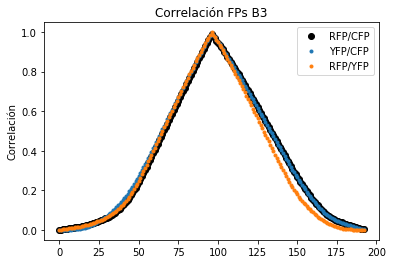

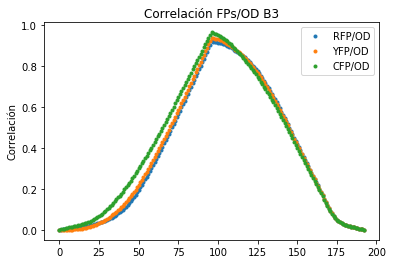

In [241]:
#Correlacion B3
from scipy import signal

ccr6=signal.correlate(rfp6,cfp6)
rf6=np.sqrt(np.sum(rfp6*rfp6))
cf6=np.sqrt(np.sum(cfp6*cfp6))
nccr6= ccr6/(rf6*cf6)

cyc6=signal.correlate(yfp6,cfp6)
yf6=np.sqrt(np.sum(yfp6*yfp6))
ncyc6= cyc6/(yf6*cf6)

cry6=signal.correlate(rfp6,yfp6)
ncry6= cry6/(rf6*yf6)

cro6=signal.correlate(rfp6,od6)
of6=np.sqrt(np.sum(od6*od6))
ncro6= cro6/(rf6*of6)

cyo6=signal.correlate(yfp6,od6)
ncyo6= cyo6/(yf6*of6)

cco6=signal.correlate(cfp6,od6)
ncco6= cco6/(cf6*of6)

plt.figure()
plt.title('Correlación FPs B3')
plt.xlabel('')
#plt.yscale('log')
plt.ylabel('Correlación')
plt.plot(nccr6,'ko',label='RFP/CFP')
plt.plot(ncyc6,'.',label='YFP/CFP')
plt.plot(ncry6,'.',label='RFP/YFP')
plt.legend()

plt.figure()
plt.title('Correlación FPs/OD B3')
plt.xlabel('')
#plt.yscale('log')
plt.ylabel('Correlación')
plt.plot(ncro6,'.',label='RFP/OD')
plt.plot(ncyo6,'.',label='YFP/OD')
plt.plot(ncco6,'.',label='CFP/OD')
plt.legend()

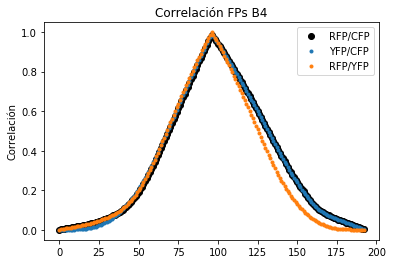

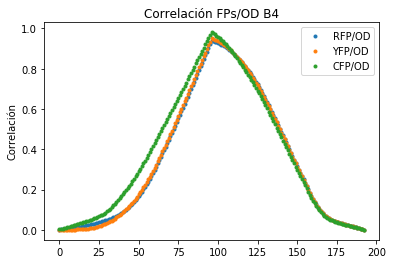

In [242]:
#Correlacion B4
from scipy import signal

ccr7=signal.correlate(rfp7,cfp7)
rf7=np.sqrt(np.sum(rfp7*rfp7))
cf7=np.sqrt(np.sum(cfp7*cfp7))
nccr7= ccr7/(rf7*cf7)

cyc7=signal.correlate(yfp7,cfp7)
yf7=np.sqrt(np.sum(yfp7*yfp7))
ncyc7= cyc7/(yf7*cf7)

cry7=signal.correlate(rfp7,yfp7)
ncry7= cry7/(rf7*yf7)

cro7=signal.correlate(rfp7,od7)
of7=np.sqrt(np.sum(od7*od7))
ncro7= cro7/(rf7*of7)

cyo7=signal.correlate(yfp7,od7)
ncyo7= cyo7/(yf7*of7)

cco7=signal.correlate(cfp7,od7)
ncco7= cco7/(cf7*of7)

plt.figure()
plt.title('Correlación FPs B4')
plt.xlabel('')
#plt.yscale('log')
plt.ylabel('Correlación')
plt.plot(nccr7,'ko',label='RFP/CFP')
plt.plot(ncyc7,'.',label='YFP/CFP')
plt.plot(ncry7,'.',label='RFP/YFP')
plt.legend()

plt.figure()
plt.title('Correlación FPs/OD B4')
plt.xlabel('')
#plt.yscale('log')
plt.ylabel('Correlación')
plt.plot(ncro7,'.',label='RFP/OD')
plt.plot(ncyo7,'.',label='YFP/OD')
plt.plot(ncco7,'.',label='CFP/OD')
plt.legend()

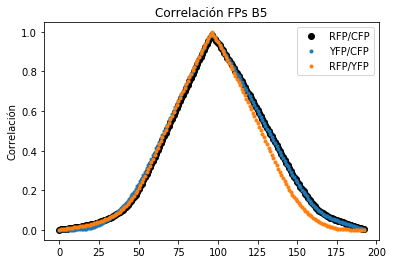

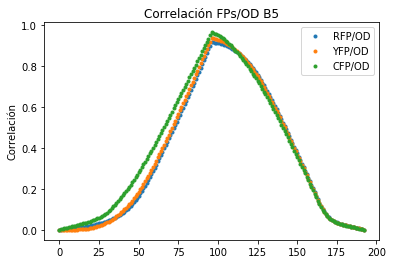

In [243]:
#Correlacion B5
from scipy import signal

ccr8=signal.correlate(rfp8,cfp8)
rf8=np.sqrt(np.sum(rfp8*rfp8))
cf8=np.sqrt(np.sum(cfp8*cfp8))
nccr8= ccr8/(rf8*cf8)

cyc8=signal.correlate(yfp8,cfp8)
yf8=np.sqrt(np.sum(yfp8*yfp8))
ncyc8= cyc8/(yf8*cf8)

cry8=signal.correlate(rfp8,yfp8)
ncry8= cry8/(rf8*yf8)

cro8=signal.correlate(rfp8,od8)
of8=np.sqrt(np.sum(od8*od8))
ncro8= cro8/(rf8*of8)

cyo8=signal.correlate(yfp8,od8)
ncyo8= cyo8/(yf8*of8)

cco8=signal.correlate(cfp8,od8)
ncco8= cco8/(cf8*of8)

plt.figure()
plt.title('Correlación FPs B5')
plt.xlabel('')
#plt.yscale('log')
plt.ylabel('Correlación')
plt.plot(nccr8,'ko',label='RFP/CFP')
plt.plot(ncyc8,'.',label='YFP/CFP')
plt.plot(ncry8,'.',label='RFP/YFP')
plt.legend()

plt.figure()
plt.title('Correlación FPs/OD B5')
plt.xlabel('')
#plt.yscale('log')
plt.ylabel('Correlación')
plt.plot(ncro8,'.',label='RFP/OD')
plt.plot(ncyo8,'.',label='YFP/OD')
plt.plot(ncco8,'.',label='CFP/OD')
plt.legend()

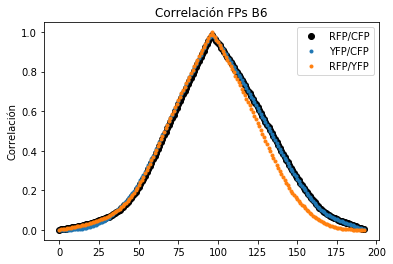

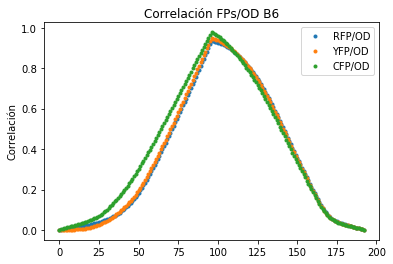

In [244]:
#Correlacion B6
from scipy import signal

ccr9=signal.correlate(rfp9,cfp9)
rf9=np.sqrt(np.sum(rfp9*rfp9))
cf9=np.sqrt(np.sum(cfp9*cfp9))
nccr9= ccr9/(rf9*cf9)

cyc9=signal.correlate(yfp9,cfp9)
yf9=np.sqrt(np.sum(yfp9*yfp9))
ncyc9= cyc9/(yf9*cf9)

cry9=signal.correlate(rfp9,yfp9)
ncry9= cry9/(rf9*yf9)

cro9=signal.correlate(rfp9,od9)
of9=np.sqrt(np.sum(od9*od9))
ncro9= cro9/(rf9*of9)

cyo9=signal.correlate(yfp9,od9)
ncyo9= cyo9/(yf9*of9)

cco9=signal.correlate(cfp9,od9)
ncco9= cco9/(cf9*of9)

plt.figure()
plt.title('Correlación FPs B6')
plt.xlabel('')
#plt.yscale('log')
plt.ylabel('Correlación')
plt.plot(nccr9,'ko',label='RFP/CFP')
plt.plot(ncyc9,'.',label='YFP/CFP')
plt.plot(ncry9,'.',label='RFP/YFP')
plt.legend()

plt.figure()
plt.title('Correlación FPs/OD B6')
plt.xlabel('')
#plt.yscale('log')
plt.ylabel('Correlación')
plt.plot(ncro9,'.',label='RFP/OD')
plt.plot(ncyo9,'.',label='YFP/OD')
plt.plot(ncco9,'.',label='CFP/OD')
plt.legend()

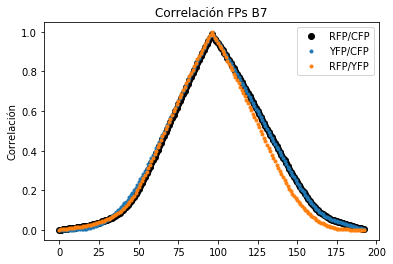

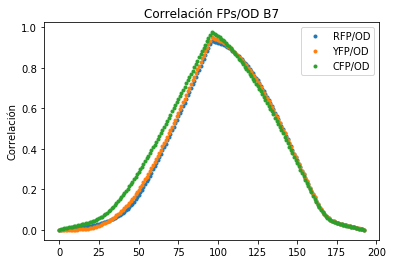

In [245]:
#Correlacion B7
from scipy import signal

ccr10=signal.correlate(rfp10,cfp10)
rf10=np.sqrt(np.sum(rfp10*rfp10))
cf10=np.sqrt(np.sum(cfp10*cfp10))
nccr10= ccr10/(rf10*cf10)

cyc10=signal.correlate(yfp10,cfp10)
yf10=np.sqrt(np.sum(yfp10*yfp10))
ncyc10= cyc10/(yf10*cf10)

cry10=signal.correlate(rfp10,yfp10)
ncry10= cry10/(rf10*yf10)

cro10=signal.correlate(rfp10,od10)
of10=np.sqrt(np.sum(od10*od10))
ncro10= cro10/(rf10*of10)

cyo10=signal.correlate(yfp10,od10)
ncyo10= cyo10/(yf10*of10)

cco10=signal.correlate(cfp10,od10)
ncco10= cco10/(cf10*of10)

plt.figure()
plt.title('Correlación FPs B7')
plt.xlabel('')
#plt.yscale('log')
plt.ylabel('Correlación')
plt.plot(nccr10,'ko',label='RFP/CFP')
plt.plot(ncyc10,'.',label='YFP/CFP')
plt.plot(ncry10,'.',label='RFP/YFP')
plt.legend()

plt.figure()
plt.title('Correlación FPs/OD B7')
plt.xlabel('')
#plt.yscale('log')
plt.ylabel('Correlación')
plt.plot(ncro10,'.',label='RFP/OD')
plt.plot(ncyo10,'.',label='YFP/OD')
plt.plot(ncco10,'.',label='CFP/OD')
plt.legend()

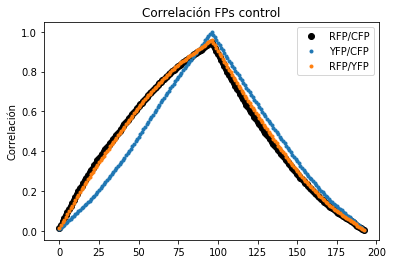

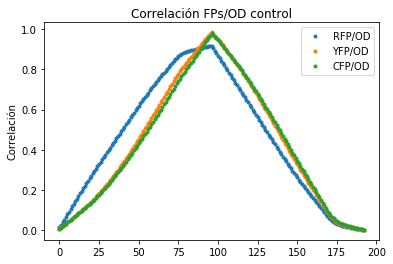

In [246]:
#Correlacion control
from scipy import signal

ccrc=signal.correlate(rfpc,cfpc)
rfc=np.sqrt(np.sum(rfpc*rfpc))
cfc=np.sqrt(np.sum(cfpc*cfpc))
nccrc= ccrc/(rfc*cfc)

cycc=signal.correlate(yfpc,cfpc)
yfc=np.sqrt(np.sum(yfpc*yfpc))
ncycc= cycc/(yfc*cfc)

cryc=signal.correlate(rfpc,yfpc)
ncryc= cryc/(rfc*yfc)

croc=signal.correlate(rfpc,odc)
ofc=np.sqrt(np.sum(odc*odc))
ncroc= croc/(rfc*ofc)

cyoc=signal.correlate(yfpc,odc)
ncyoc= cyoc/(yfc*ofc)

ccoc=signal.correlate(cfpc,odc)
nccoc= ccoc/(cfc*ofc)


plt.figure()
plt.title('Correlación FPs control')
plt.xlabel('')
#plt.yscale('log')
plt.ylabel('Correlación')
plt.plot(nccrc,'ko',label='RFP/CFP')
plt.plot(ncycc,'.',label='YFP/CFP')
plt.plot(ncryc,'.',label='RFP/YFP')
plt.legend()

plt.figure()
plt.title('Correlación FPs/OD control')
plt.xlabel('')
#plt.yscale('log')
plt.ylabel('Correlación')
plt.plot(ncroc,'.',label='RFP/OD')
plt.plot(ncyoc,'.',label='YFP/OD')
plt.plot(nccoc,'.',label='CFP/OD')
plt.legend()

In [247]:
#Promedios 
pnccr=[nccrc,nccr1,nccr2,nccr3,nccr4,nccr5,nccr6,nccr7,nccr8,nccr9,nccr10]
pncyc=[ncycc,ncyc1,ncyc2,ncyc3,ncyc4,ncyc5,ncyc6,ncyc7,ncyc8,ncyc9,ncyc10]
pncry=[ncryc,ncry1,ncry2,ncry3,ncry4,ncry5,ncry6,ncry7,ncry8,ncry9,ncry10]
pncro=[ncroc,ncro1,ncro2,ncro3,ncro4,ncro5,ncro6,ncro7,ncro8,ncro9,ncro10]
pncyo=[ncyoc,ncyo1,ncyo2,ncyo3,ncyo4,ncyo5,ncyo6,ncyo7,ncyo8,ncyo9,ncyo10]
pncco=[nccoc,ncco1,ncco2,ncco3,ncco4,ncco5,ncco6,ncco7,ncco8,ncco9,ncco10]

def prom(list):
    for i in list:
        av=(np.array(list[1])+np.array(list[2])+np.array(list[3])+np.array(list[4])+np.array(list[5])+np.array(list[6])+np.array(list[7])+np.array(list[8])+np.array(list[9])+np.array(list[10]))/10
        return av
    print(av.shape)
    
a=prom(pnccr)
b=prom(pncyc)
c=prom(pncry)
d=prom(pncro)
f=prom(pncyo)
g=prom(pncco)
print(a.shape)
print(b.shape)
print(c.shape)
print(d.shape)
print(f.shape)
print(g.shape)

(193,)
(193,)
(193,)
(193,)
(193,)
(193,)


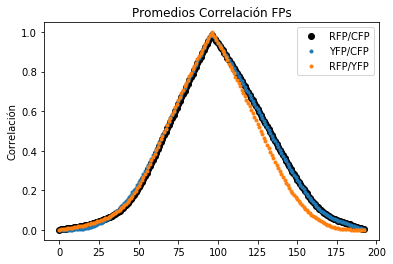

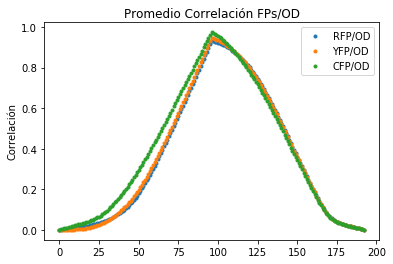

In [248]:
#Promedios correlación
a=av_correlation(pnccr)
b=av_correlation(pncyc)
c=av_correlation(pncry)
d=av_correlation(pncro)
f=av_correlation(pncyo)
g=av_correlation(pncco)

plt.figure()
plt.title('Promedios Correlación FPs')
plt.xlabel('')
#plt.yscale('log')
plt.ylabel('Correlación')
plt.plot(a,'ko',label='RFP/CFP')
plt.plot(b,'.',label='YFP/CFP')
plt.plot(c,'.',label='RFP/YFP')
plt.legend()

plt.figure()
plt.title('Promedio Correlación FPs/OD')
plt.xlabel('')
#plt.yscale('log')
plt.ylabel('Correlación')
plt.plot(d,'.',label='RFP/OD')
plt.plot(f,'.',label='YFP/OD')
plt.plot(g,'.',label='CFP/OD')
plt.legend()

In [249]:
#tasas de síntesis para replicas contra od y tiempo
dt=np.diff(tt)
do=np.diff(od1)
#A3
dfo1=np.diff(od1)
dfc1=np.diff(cfp1)
dfr1=np.diff(rfp1)
dfy1=np.diff(yfp1)
#A4
dfo2=np.diff(od2)
dfc2=np.diff(cfp2)
dfr2=np.diff(rfp2)
dfy2=np.diff(yfp2)
#A5
dfo3=np.diff(od3)
dfc3=np.diff(cfp3)
dfr3=np.diff(rfp3)
dfy3=np.diff(yfp3)
#A6
dfo4=np.diff(od4)
dfc4=np.diff(cfp4)
dfr4=np.diff(rfp4)
dfy4=np.diff(yfp4)
#A7
dfo5=np.diff(od5)
dfc5=np.diff(cfp5)
dfr5=np.diff(rfp5)
dfy5=np.diff(yfp5)
#B3
dfo6=np.diff(od6)
dfc6=np.diff(cfp6)
dfr6=np.diff(rfp6)
dfy6=np.diff(yfp6)
#B4
dfo7=np.diff(od7)
dfc7=np.diff(cfp7)
dfr7=np.diff(rfp7)
dfy7=np.diff(yfp7)
#B5
dfo8=np.diff(od8)
dfc8=np.diff(cfp8)
dfr8=np.diff(rfp8)
dfy8=np.diff(yfp8)
#B6
dfo9=np.diff(od9)
dfc9=np.diff(cfp9)
dfr9=np.diff(rfp9)
dfy9=np.diff(yfp9)
#B7
dfo10=np.diff(od10)
dfc10=np.diff(cfp10)
dfr10=np.diff(rfp10)
dfy10=np.diff(yfp10)
#PROMEDIO
dfcp=np.diff(cfpp)
dfrp=np.diff(rfpp)
dfyp=np.diff(yfpp)
#CONTROL
dfcc=np.diff(cfpc)
dfrc=np.diff(rfpc)
dfyc=np.diff(yfpc)


C:\Users\maca\Anaconda3\envs\BIO399E\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\maca\Anaconda3\envs\BIO399E\lib\site-packages\ipykernel\__main__.py:14: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\maca\Anaconda3\envs\BIO399E\lib\site-packages\ipykernel\__main__.py:23: RuntimeWarning: divide by zero encountered in true_divide


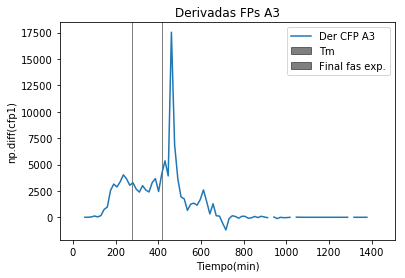

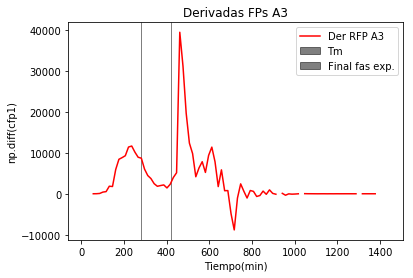

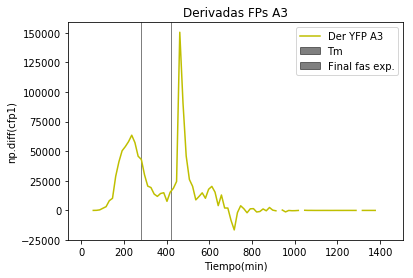

In [254]:
plt.figure()
plt.title('Derivadas FPs A3')
plt.xlabel('Tiempo(min)')
plt.ylabel('np.diff(cfp1)')
plt.plot(tt[:-1],(dy1*(dfc1/dfo1)),label='Der CFP A3')
plt.axvspan(tm1,tm1, color='k', alpha=0.5, label="Tm")
plt.axvspan(ttot1,ttot1, color='k', alpha=0.5, label="Final fas exp.")
plt.legend()

plt.figure()
plt.title('Derivadas FPs A3')
plt.xlabel('Tiempo(min)')
plt.ylabel('np.diff(cfp1)')
plt.plot(tt[:-1],(dy1*(dfr1/dfo1)),'r',label='Der RFP A3')
plt.axvspan(tm1,tm1, color='k', alpha=0.5, label="Tm")
plt.axvspan(ttot1,ttot1, color='k', alpha=0.5, label="Final fas exp.")
plt.legend()

plt.figure()
plt.title('Derivadas FPs A3')
plt.xlabel('Tiempo(min)')
plt.ylabel('np.diff(cfp1)')
plt.plot(tt[:-1],(dy1*(dfy1/dfo1)),'y',label='Der YFP A3')
plt.axvspan(tm1,tm1, color='k', alpha=0.5, label="Tm")
plt.axvspan(ttot1,ttot1, color='k', alpha=0.5, label="Final fas exp.")
plt.legend()